# **Predict Customer Personality to Boost Marketing Campaign**
---

# Import Library

In [396]:
# Data manipulation
import numpy as np
import pandas as pd
import datetime as dt

# Data visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [397]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Read Data

In [398]:
# Read data
link = 'https://raw.githubusercontent.com/sabirinID/Predicting-Customer-Personality/main/Dataset/marketing_campaign_dataset.csv'
df = pd.read_csv(link, index_col=0)

In [399]:
df.sample(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
796,6722,1954,S3,Menikah,70421000.0,0,1,28-06-2014,98,479000,28000,136000,75000,14000,35000,3,10,3,7,6,0,0,0,0,0,0,3,11,0
1526,202,1948,S3,Janda,82032000.0,0,0,05-04-2014,54,332000,194000,377000,149000,125000,57000,0,4,6,7,1,0,0,0,0,0,0,3,11,0
1962,6355,1978,S1,Menikah,44359000.0,1,1,17-06-2014,19,20000,0,14000,7000,3000,1000,3,2,0,4,3,0,0,0,0,0,0,3,11,0
715,10479,1975,S3,Menikah,76618000.0,0,0,07-12-2012,64,749000,40000,294000,121000,160000,147000,1,3,2,5,1,0,0,0,0,0,0,3,11,0
708,3336,1948,S3,Bertunangan,66375000.0,0,1,21-11-2013,96,712000,0,45000,0,0,191000,3,2,4,5,7,1,0,0,0,0,0,3,11,0


# Data Understanding

## Features Definition

| Feature Name           | Feature Description                              |
|------------------------|--------------------------------------------------|
| ID                     | Customer ID                                      |
| Year_Birth             | Customer’s year of birth                         |
| Education              | Customer’s level of education                    |
| Marital_Status         | Customer’s marital status                        |
| Income                 | Customer’s yearly household income               |
| Kidhome                | Number of kids in customer’s household           |
| Teenhome               | Number of teenagers in customer’s household      |
| Dt_Customer            | Date of customer joining                         |
| Recency                | Number of days since customer’s last purchase    |
| MntCoke                | Amount spent on coke products                    |
| MntFruits              | Amount spent on fruit products                   |
| MntMeatProducts        | Amount spent on meat products                    |
| MntFishProducts        | Amount spent on fish products                    |
| MntSweetProducts       | Amount spent on sweet products                   |
| MntGoldProds           | Amount spent on gold products                    |
| NumDealsPurchases      | Number of purchases made with a special discount |
| NumWebPurchases        | Number of purchases made through the web         |
| NumCatalogPurchases    | Number of purchases made made using a catalog    |
| NumStorePurchases      | Number of purchases made made directly in stores |
| NumWebVisitsMonth      | Number of visits to the web in the last month    |
| AcceptedCmp3           | Whether the customer accepted campaign 3         |
| AcceptedCmp4           | Whether the customer accepted campaign 4         |
| AcceptedCmp5           | Whether the customer accepted campaign 5         |
| AcceptedCmp1           | Whether the customer accepted campaign 1         |
| AcceptedCmp2           | Whether the customer accepted campaign 2         |
| Complain               | Whether the customer has made a complaint        |
| Z_CostContact          | Cost of contacting the customer                  |
| Z_Revenue              | Revenue from the customer                        |
| Response               | Whether the customer responded to the campaign   |

## Dimensions of the DataFrame

In [400]:
df.shape

(2240, 29)

In [401]:
print('Dataset ini memiliki dimensi data, yaitu')
print('Jumlah baris: {}'.format(df.shape[0]))
print('Jumlah kolom: {}'.format(df.shape[1]))

Dataset ini memiliki dimensi data, yaitu
Jumlah baris: 2240
Jumlah kolom: 29


## Data Types of the Features

In [402]:
# Data information
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntCoke              2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   int64 

🔎 Observasi
- Tipe data: float64, int64, dan object.
- Fitur `ID` hanya berisi identifikasi unik untuk setiap baris data tanpa memberikan informasi tambahan yang relevan untuk analisis, sehingga dapat dihapus.
- Fitur `Income` memiliki kurang dari 2.240 _non-null values_.
- Fitur `Dt_Customer` seharusnya memiliki tipe data datetime bukan object, sehingga harus diubah.
- Beberapa fitur perlu diubah penamaannya agar tidak menimbulkan ketidakjelasan atau ambiguitas. Penamaan fitur akan menggunakan kaidah penamaan `PascalCase` atau `UpperCamelCase`.
- Pada tahap _feature engineering_, kita akan membuat fitur baru, seperti `Age` dan `AgeGroup`, `MembershipYear`, `TotalChildren`, `TotalSpending`, `TotalPurchasing`, `TotalAcceptedCampaigns`, dan `ConversionRate`.

In [403]:
# Drop 'ID' feature
df.drop(columns=['ID'], inplace=True)

# Fix data type: object to datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

# Rename features
features = {
    'Year_Birth'      : 'BirthYear',
    'Marital_Status'  : 'MaritalStatus',
    'Kidhome'         : 'NumKids',
    'Teenhome'        : 'NumTeenagers',
    'Dt_Customer'     : 'CustomerDate',
    'MntCoke'         : 'CokeSpending',
    'MntFruits'       : 'FruitSpending',
    'MntMeatProducts' : 'MeatSpending',
    'MntFishProducts' : 'FishSpending',
    'MntSweetProducts': 'SweetSpending',
    'MntGoldProds'    : 'GoldSpending',
    'AcceptedCmp3'    : 'AcceptedCampaign3',
    'AcceptedCmp4'    : 'AcceptedCampaign4',
    'AcceptedCmp5'    : 'AcceptedCampaign5',
    'AcceptedCmp1'    : 'AcceptedCampaign1',
    'AcceptedCmp2'    : 'AcceptedCampaign2',
    'Complain'        : 'Complaint',
    'Z_CostContact'   : 'ContactingCost',
    'Z_Revenue'       : 'Revenue'
}
df = df.rename(columns=features)

In [404]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   BirthYear            2240 non-null   int64         
 1   Education            2240 non-null   object        
 2   MaritalStatus        2240 non-null   object        
 3   Income               2216 non-null   float64       
 4   NumKids              2240 non-null   int64         
 5   NumTeenagers         2240 non-null   int64         
 6   CustomerDate         2240 non-null   datetime64[ns]
 7   Recency              2240 non-null   int64         
 8   CokeSpending         2240 non-null   int64         
 9   FruitSpending        2240 non-null   int64         
 10  MeatSpending         2240 non-null   int64         
 11  FishSpending         2240 non-null   int64         
 12  SweetSpending        2240 non-null   int64         
 13  GoldSpending         2240 non-null   i

✅ Tipe data untuk setiap fitur dalam dataset sudah sesuai.

# Data Preprocessing

## Feature Engineering

🔽 Monthly Web Visits

In [405]:
df[df['NumWebVisitsMonth'] == 0].reset_index(drop=True)

,BirthYear,Education,MaritalStatus,Income,NumKids,NumTeenagers,CustomerDate,Recency,CokeSpending,FruitSpending,MeatSpending,FishSpending,SweetSpending,GoldSpending,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCampaign3,AcceptedCampaign4,AcceptedCampaign5,AcceptedCampaign1,AcceptedCampaign2,Complaint,ContactingCost,Revenue,Response
0,1973,S3,Menikah,157243000.0,0,1,2014-03-01,98,20000,2000,1582000,1000,2000,1000,15,0,22,0,0,0,0,0,0,0,0,3,11,0
1,1975,S1,Cerai,153924000.0,0,0,2014-02-07,81,1000,1000,1000,1000,1000,1000,0,0,0,0,0,0,0,0,0,0,0,3,11,0
2,1982,S3,Menikah,160803000.0,0,0,2012-08-04,21,55000,16000,1622000,17000,3000,4000,15,0,28,1,0,0,0,0,0,0,0,3,11,0
3,1977,S1,Lajang,85072000.0,0,0,2014-04-09,94,494000,92000,391000,194000,11000,241000,1,3,4,10,0,0,0,0,0,0,0,3,11,0
4,1962,S1,Menikah,83715000.0,0,0,2014-02-03,2,318000,8000,407000,150000,35000,8000,1,2,8,13,0,0,0,0,0,0,0,3,11,0
5,1952,S3,Bertunangan,85431000.0,0,0,2013-06-08,54,376000,53000,462000,168000,53000,53000,1,2,7,7,0,0,0,0,0,0,0,3,11,0
6,1966,S3,Lajang,7144000.0,0,2,2013-12-07,92,81000,4000,33000,5000,2000,291000,0,23,1,1,0,0,0,0,0,0,0,3,11,0
7,1960,D3,Bertunangan,92556000.0,0,0,2014-04-20,32,493000,183000,352000,184000,23000,28000,0,3,5,13,0,0,0,0,0,0,0,3,11,0
8,1950,S3,Janda,76842000.0,0,0,2014-05-03,37,605000,10000,345000,84000,54000,32000,1,1,8,7,0,0,0,0,0,0,0,3,11,0
9,1949,S3,Menikah,156924000.0,0,0,2013-08-29,85,2000,1000,2000,1000,1000,1000,0,0,0,0,0,0,0,0,0,0,0,3,11,0


In [406]:
df = df[df['NumWebVisitsMonth'] > 0]

🔽 Age dan Age Group

In [407]:
# Current year
current_year = dt.datetime.now().year

# Age
df['Age'] = current_year - df['BirthYear']

age_min = df['Age'].min()
age_max = df['Age'].max()
print(f'Usia minimum : {age_min}')
print(f'Usia maksimum: {age_max}')

Usia minimum : 27
Usia maksimum: 130


In [408]:
# Age group
df['AgeGroup'] = df['Age'].apply(lambda x: 'Dewasa' if x < 45 else (
                                           'Pralansia' if x < 60 else (
                                           'Lansia')))
df['AgeGroup'].value_counts()

AgeGroup
Pralansia    1014
Lansia        739
Dewasa        476
Name: count, dtype: int64

🔽 Membership Year

In [409]:
# Membership year
df['MembershipYear'] = current_year - df['CustomerDate'].dt.year
df['MembershipYear'] = df['MembershipYear'].astype('int64')
df['MembershipYear'].value_counts()

MembershipYear
10    1186
9      551
11     492
Name: count, dtype: int64

🔽 Total Children

In [410]:
# Number of children
df['TotalChildren'] = df['NumKids'] + df['NumTeenagers']
df['TotalChildren'].value_counts()

TotalChildren
1    1127
0     629
2     420
3      53
Name: count, dtype: int64

🔽 Total Spending

In [411]:
# Total spending by a customer
df['TotalSpending'] = df['CokeSpending'] + df['FruitSpending'] + df['MeatSpending'] + df['FishSpending'] + df['SweetSpending'] + df['GoldSpending']

🔽 Total Purchasing

In [412]:
# Total purchasing by a customer
df['TotalPurchasing'] = df['NumDealsPurchases'] + df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']

🔽 Total Accepted Campaigns

In [413]:
# Total number of campaign accepted by a customer
df['TotalAcceptedCampaigns'] = df['AcceptedCampaign1'] + df['AcceptedCampaign2'] + df['AcceptedCampaign3'] + df['AcceptedCampaign4'] + df['AcceptedCampaign5']

🔽 Conversion Rate

        Conversion Rate = (Total Purchasing / Total Web Visits) * 100

In [414]:
# Define conversion function
def conversion(x, y):
    if y == 0:
        return 0
    return x / y

# Conversion rate
df['ConversionRate'] = round(df.apply(lambda x: conversion(x['TotalPurchasing'], x['NumWebVisitsMonth']), axis=1), 2)

## Exploratory Data Analysis

### Descriptive Statistics

In [415]:
# Statistics for the columns (features)
df.describe(include='all')

,BirthYear,Education,MaritalStatus,Income,NumKids,NumTeenagers,CustomerDate,Recency,CokeSpending,FruitSpending,MeatSpending,FishSpending,SweetSpending,GoldSpending,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCampaign3,AcceptedCampaign4,AcceptedCampaign5,AcceptedCampaign1,AcceptedCampaign2,Complaint,ContactingCost,Revenue,Response,Age,AgeGroup,MembershipYear,TotalChildren,TotalSpending,TotalPurchasing,TotalAcceptedCampaigns,ConversionRate
count,2229.000000,2229,2229,2.206000e+03,2229.000000,2229.000000,2229,2229.000000,2.229000e+03,2229.000000,2.229000e+03,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.0,2229.0,2229.000000,2229.000000,2229,2229.000000,2229.000000,2.229000e+03,2229.000000,2229.000000,2229.000000
unique,NaN,5,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,S1,Menikah,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pralansia,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1124,860,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1014,NaN,NaN,NaN,NaN,NaN,NaN
mean,1968.820547,NaN,NaN,5.200374e+07,0.446389,0.507402,2013-07-09 23:16:04.199192320,49.060565,3.043244e+05,26265.141319,1.647214e+05,37344.100493,27111.709287,43933.153881,2.321220,4.089726,2.637954,5.794975,5.342755,0.073127,0.074473,0.073127,0.064603,0.013459,0.009421,3.0,11.0,0.149843,54.179453,NaN,9.973531,0.953791,6.036999e+05,14.843876,0.298789,4.416860
min,1893.000000,NaN,NaN,1.730000e+06,0.000000,0.000000,2012-07-30 00:00:00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,27.000000,NaN,9.000000,0.000000,5.000000e+03,0.000000,0.000000,0.000000
25%,1959.000000,NaN,NaN,3.520850e+07,0.000000,0.000000,2013-01-16 00:00:00,24.000000,2.400000e+04,1000.000000,1.600000e+04,3000.000000,1000.000000,9000.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,46.000000,NaN,10.000000,0.000000,6.800000e+04,8.000000,0.000000,1.250000
50%,1970.000000,NaN,NaN,5.130100e+07,0.000000,0.000000,2013-07-08 00:00:00,49.000000,1.740000e+05,8000.000000,6.700000e+04,12000.000000,8000.000000,24000.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,53.000000,NaN,10.000000,1.000000,3.950000e+05,15.000000,0.000000,2.620000
75%,1977.000000,NaN,NaN,6.827925e+07,1.000000,1.000000,2013-12-29 00:00:00,74.000000,5.050000e+05,33000.000000,2.300000e+05,50000.000000,33000.000000,56000.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,64.000000,NaN,10.000000,1.000000,1.040000e+06,21.000000,0.000000,5.400000
max,1996.000000,NaN,NaN,6.666660e+08,2.000000,2.000000,2014-06-29 00:00:00,99.000000,1.493000e+06,199000.000000,1.725000e+06,259000.000000,263000.000000,362000.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000,130.000000,NaN,11.000000,3.000000,2.525000e+06,43.000000,4.000000,43.000000


In [416]:
# Define features
num = df.select_dtypes(exclude=['object'])
cat = df.select_dtypes(include=['object'])

num_cols = num.columns
cat_cols = cat.columns

In [417]:
print(f'Jumlah fitur numerikal  : {num.shape[1]}')
print(f'Jumlah fitur kategorikal: {cat.shape[1]}')

Jumlah fitur numerikal  : 33
Jumlah fitur kategorikal: 3


#### Numerical Features

In [418]:
num.describe(percentiles=[0.25, 0.50, 0.75, 0.85, 0.90, 0.95]).T

,count,mean,min,25%,50%,75%,85%,90%,95%,max,std
BirthYear,2229.0,1968.820547,1893.0,1959.0,1970.0,1977.0,1982.0,1984.0,1988.0,1996.0,11.984772
Income,2206.0,52003742.06709,1730000.0,35208500.0,51301000.0,68279250.0,75434000.0,79619500.0,83835000.0,666666000.0,24761374.514746
NumKids,2229.0,0.446389,0.0,0.0,0.0,1.0,1.0,1.0,1.0,2.0,0.538818
NumTeenagers,2229.0,0.507402,0.0,0.0,0.0,1.0,1.0,1.0,1.0,2.0,0.54391
CustomerDate,2229,2013-07-09 23:16:04.199192320,2012-07-30 00:00:00,2013-01-16 00:00:00,2013-07-08 00:00:00,2013-12-29 00:00:00,2014-03-17 00:00:00,2014-04-18 00:00:00,2014-05-22 00:00:00,2014-06-29 00:00:00,NaN
Recency,2229.0,49.060565,0.0,24.0,49.0,74.0,84.0,89.0,94.0,99.0,28.940622
CokeSpending,2229.0,304324.3607,0.0,24000.0,174000.0,505000.0,700200.0,823000.0,1000000.0,1493000.0,337016.409634
FruitSpending,2229.0,26265.141319,0.0,1000.0,8000.0,33000.0,60800.0,82200.0,122600.0,199000.0,39683.896299
MeatSpending,2229.0,164721.399731,0.0,16000.0,67000.0,230000.0,395800.0,497200.0,682200.0,1725000.0,219691.956272
FishSpending,2229.0,37344.100493,0.0,3000.0,12000.0,50000.0,89000.0,120000.0,168000.0,259000.0,54418.441086


🔎 Observasi
- Mayoritas pelanggan memiliki `Income` atau pendapatan sekitar Rp51.301.000 per tahun.
- Mayoritas pelanggan melakukan pembelian kembali sekitar 49 hari atau 7 pekan.
- Mayoritas pelanggan tidak melakukan `Complaint`.
- Mayoritas pelanggan berusia 53 tahun.
- Mayoritas pelanggan telah menjadi _membership_ selama 10 tahun.
- Mayoritas pelanggan memiliki 1 anak.
- Mayoritas pelanggan mengeluarkan uang sekitar Rp395.000.
- Mayoritas pelanggan melakukan transaksi sebanyak 15 kali.
- Sebagian besar pelanggan tidak menerima _campaign_ yang diberikan.
- Tingkat konversi kunjungan web menjadi pembelian sekitar 2,62%.

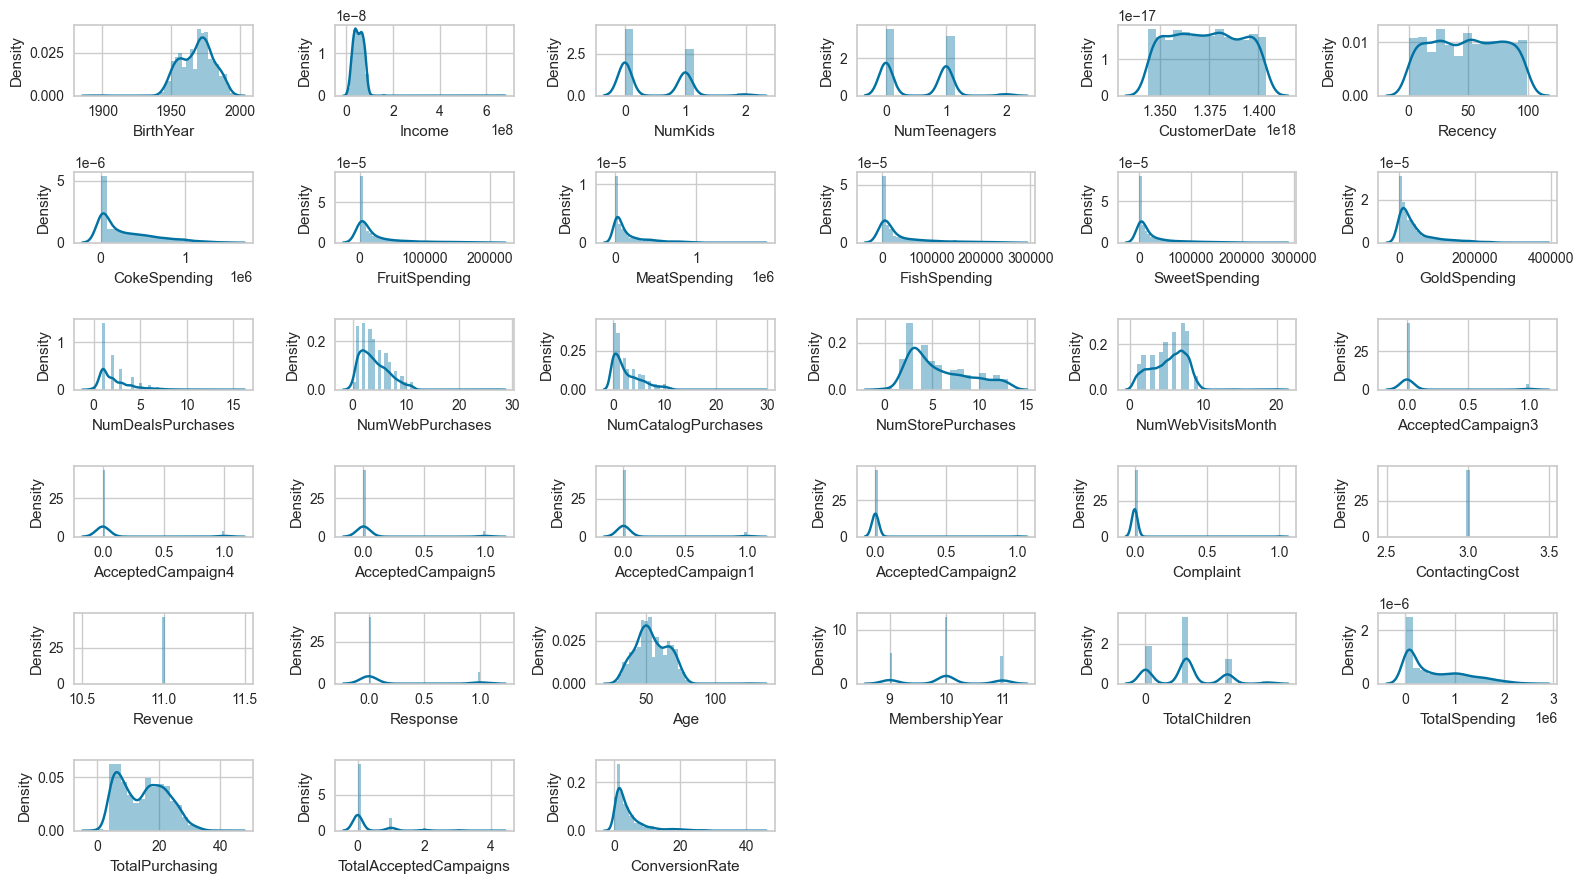

In [419]:
plt.figure(figsize=(16, 9))
for i in range(0, len(num_cols)):
    plt.subplot(6, 6, i+1)
    sns.distplot(df[num_cols[i]])
    plt.tight_layout()

🔎 Observasi
- Secara umum, fitur-fitur dalam dataset memiliki distribusi yang cenderung _positively skewed_ atau menceng kanan.
- Fitur `CustomerDate` dan `Recency` memiliki distribusi yang cenderung normal.

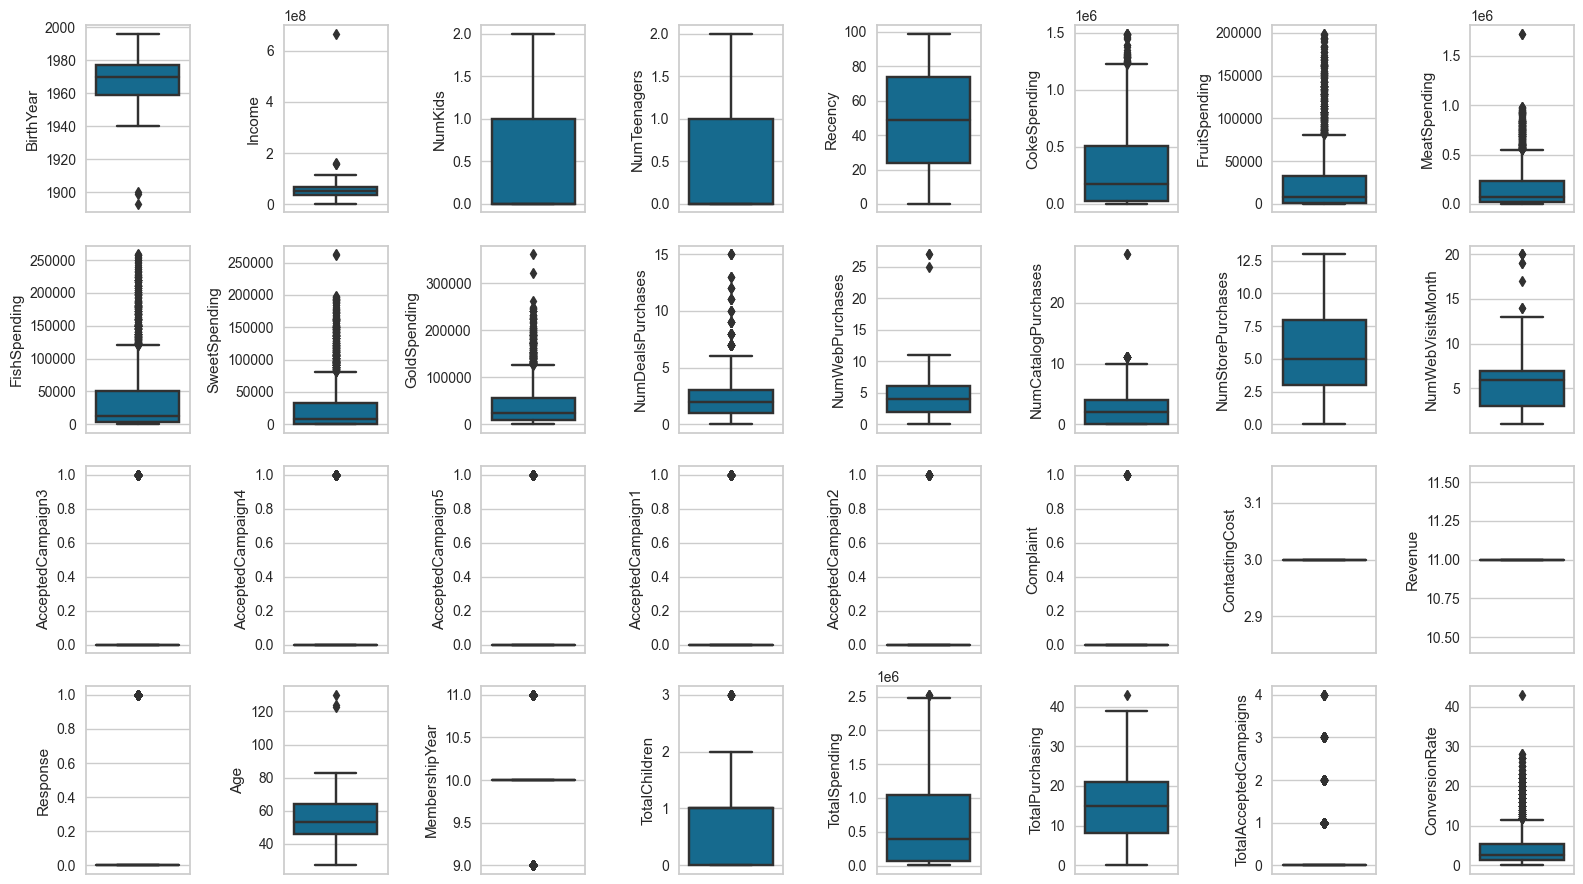

In [420]:
plt.figure(figsize=(16, 9))
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

for i in range(0, len(num_cols)):
    plt.subplot(4, 8, i+1)
    sns.boxplot(y=df[num_cols[i]])
    plt.tight_layout()

🔎 Observasi
- Secara umum, sebagian besar fitur menunjukkan adanya _outlier_.
- Fitur seperti `BirthYear` dan `Income` menunjukkan adanya nilai yang ekstrem, sehingga kita akan menghilangkan nilai-nilai ekstrem tersebut agar tidak mengurangi _insight_ yang diperoleh dari analisis data.

#### Categorical Features

In [421]:
cat.describe().T

,count,unique,top,freq
Education,2229,5,S1,1124
MaritalStatus,2229,6,Menikah,860
AgeGroup,2229,3,Pralansia,1014


🔽 `Education`

In [422]:
df['Education'].value_counts(normalize=True)

Education
S1     0.504262
S3     0.215343
S2     0.165994
D3     0.090175
SMA    0.024226
Name: proportion, dtype: float64

🔽 `MaritalStatus`

In [423]:
df['MaritalStatus'].value_counts(normalize=True)

MaritalStatus
Menikah        0.385823
Bertunangan    0.258860
Lajang         0.216240
Cerai          0.103634
Janda          0.034096
Duda           0.001346
Name: proportion, dtype: float64

🔽 `AgeGroup`

In [424]:
df['AgeGroup'].value_counts(normalize=True)

AgeGroup
Pralansia    0.454913
Lansia       0.331539
Dewasa       0.213549
Name: proportion, dtype: float64

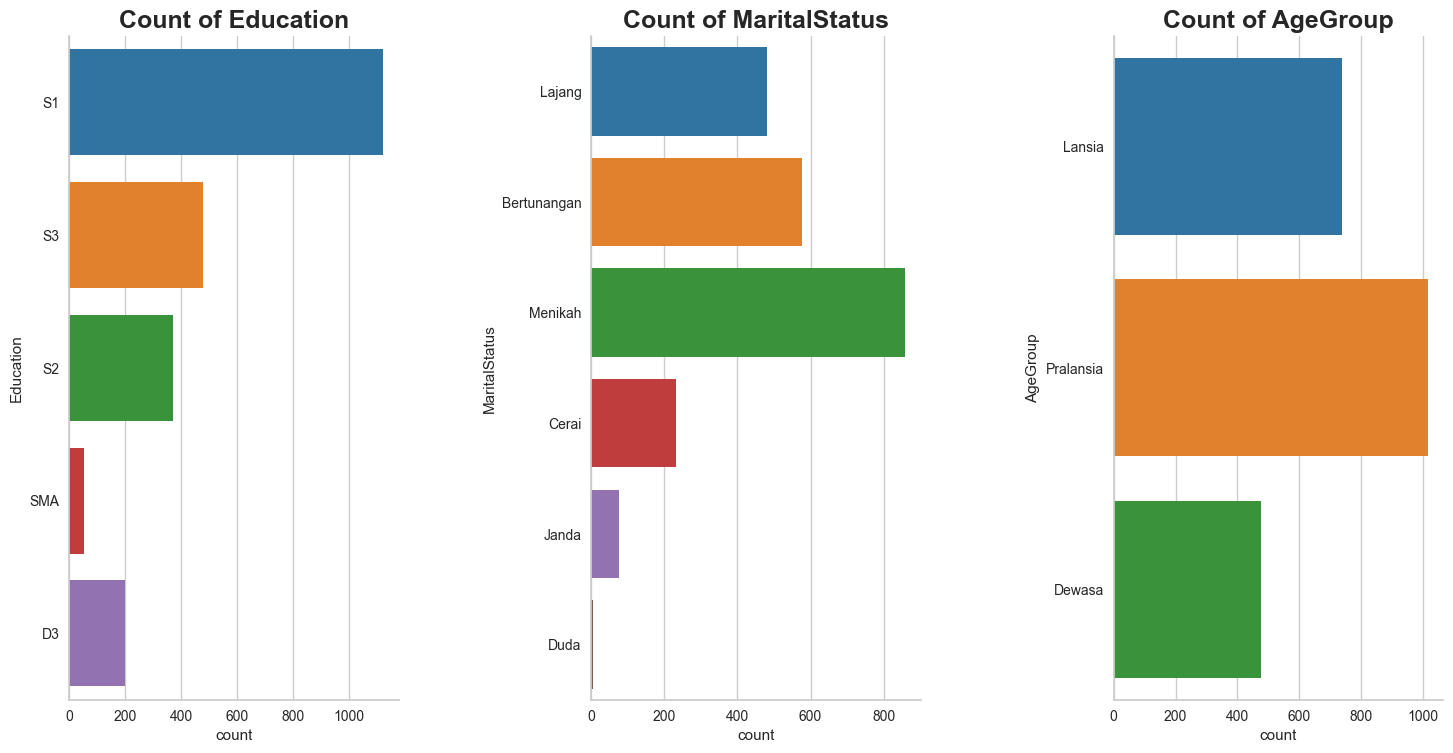

In [425]:
plt.figure(figsize=(16, 9))
for i in range(0, len(cat_cols)):
    plt.subplot(1, 3, i+1)
    ax = sns.countplot(y=df[cat_cols[i]], palette='tab10')
    plt.title(f'Count of {cat_cols[i]}', fontsize=18, weight='bold')
    sns.despine()
    plt.tight_layout(pad=5)

plt.show()

🔎 Insights
- Mayoritas pelanggan memiliki tingkat pendidikan S1 (50,4%), telah menikah (38,6%), dan termasuk ke dalam kelompok usia: Pralansia (45,5%).

### Univariate Analysis

In [426]:
features = ['Income', 'Recency', 'Age', 'MembershipYear', 'TotalChildren', 'TotalSpending', 'TotalPurchasing', 'TotalAcceptedCampaigns', 'ConversionRate']

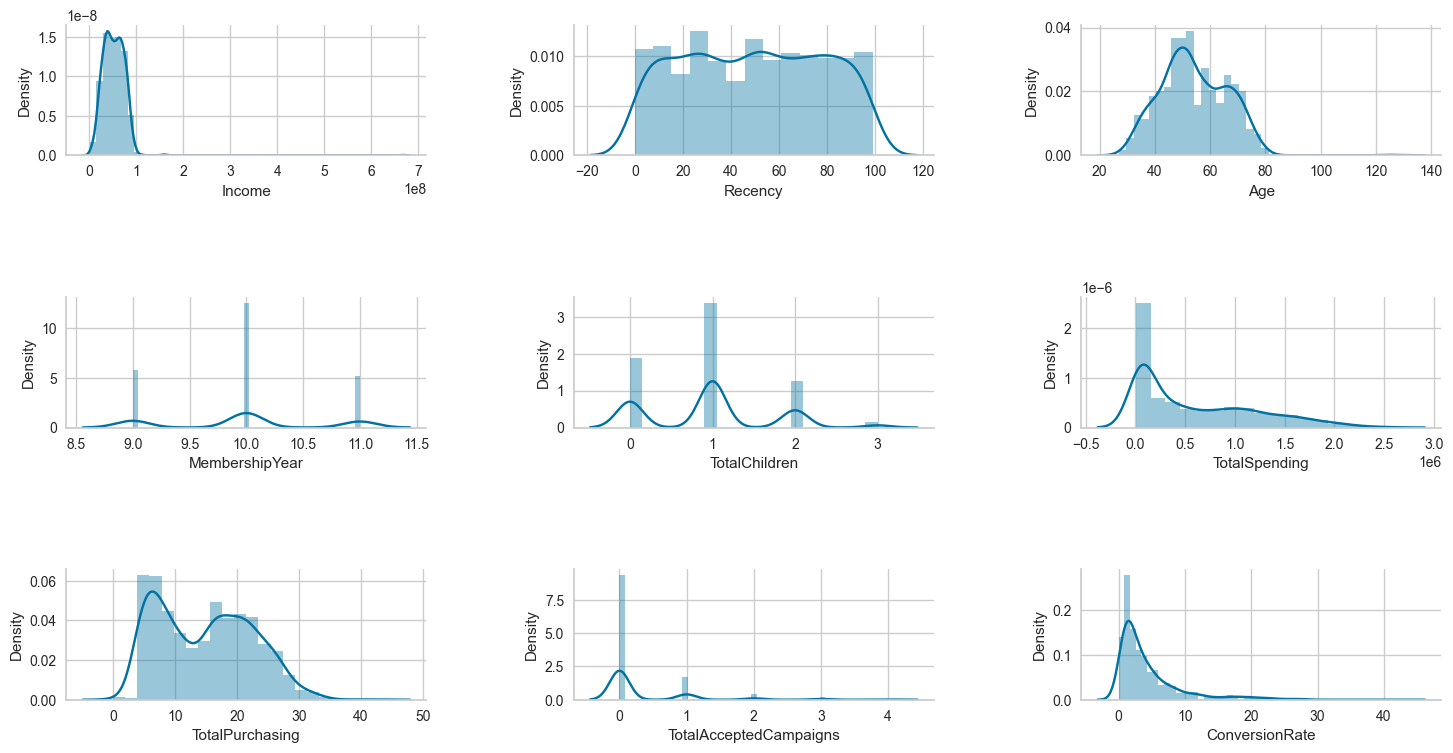

In [427]:
plt.figure(figsize=(16, 9))
for i in range(0, len(features)):
    plt.subplot(3, 3, i+1)
    sns.distplot(df[features[i]])
    sns.despine()
    plt.tight_layout(pad=5)

plt.show()

🔎 Insights
- Fitur `Income`, `Recency`, dan `Age` memiliki distribusi yang cenderung normal.
- Fitur `TotalSpending`, `TotalPurchasing`, dan `ConversionRate` memiliki distribusi yang cenderung menceng ke kanan atau _right skewed_.

### Bivariate Analysis

Pada tahap ini, kami melakukan _Conversion Rate Analysis_ berdasarkan `Income` (pendapatan), `TotalSpending` (pengeluaran), dan `Age` (usia). Namun, sebelum melakukan analisis lebih lanjut, terlebih dahulu dilakukan _handle outliers_ pada ketiga fitur tersebut.

#### Handle Outliers

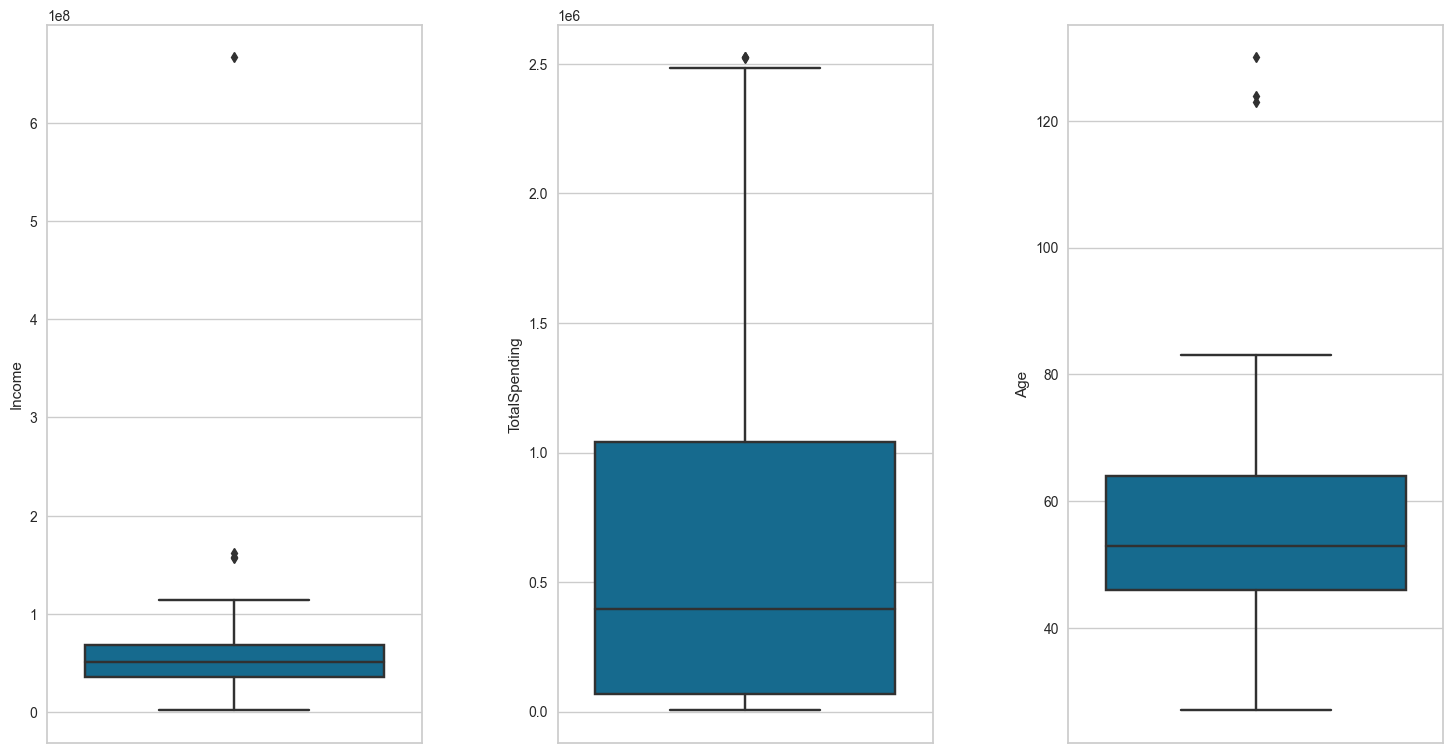

In [428]:
# Check outliers
plt.figure(figsize=(16, 9))
cols = ['Income', 'TotalSpending', 'Age']

for i in range(0, len(cols)):
    plt.subplot(1, 3, i+1)
    sns.boxplot(y=df[cols[i]])
    plt.tight_layout(pad=5)

🔎 Observasi
- Fitur `Income` dan `Age` menunjukkan adanya nilai yang ekstrem, sehingga kita akan menghilangkan nilai tersebut.
- Fitur `TotalSpending` memiliki _outlier_ yang berada sangat dekat dengan _upper whisker_, sehingga kita akan biarkan tanpa perlakuan khusus.

🔽 `Income`

In [429]:
# Calculate the upper whisker
Q1 = df['Income'].quantile(q=0.25) # First quartile
Q3 = df['Income'].quantile(q=0.75) # Third quartile
IQR = Q3 - Q1                      # Interquartile range

upper_whisker = (Q3 + 1.5 * IQR)
upper_whisker

117885375.0

In [430]:
df[df['Income'] > upper_whisker].reset_index(drop=True)

,BirthYear,Education,MaritalStatus,Income,NumKids,NumTeenagers,CustomerDate,Recency,CokeSpending,FruitSpending,MeatSpending,FishSpending,SweetSpending,GoldSpending,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCampaign3,AcceptedCampaign4,AcceptedCampaign5,AcceptedCampaign1,AcceptedCampaign2,Complaint,ContactingCost,Revenue,Response,Age,AgeGroup,MembershipYear,TotalChildren,TotalSpending,TotalPurchasing,TotalAcceptedCampaigns,ConversionRate
0,1976,S3,Bertunangan,162397000.0,1,1,2013-06-03,31,85000,1000,16000,2000,1000,2000,0,0,0,1,1,0,0,0,0,0,0,3,11,0,47,Pralansia,10,2,107000,1,0,1.00
1,1971,S2,Bertunangan,157733000.0,1,0,2013-06-04,37,39000,1000,9000,2000,0,8000,0,1,0,1,1,0,0,0,0,0,0,3,11,0,52,Pralansia,10,1,59000,2,0,2.00
2,1977,S1,Bertunangan,157146000.0,0,0,2013-04-29,13,1000,0,1725000,2000,1000,1000,0,0,28,0,1,0,0,0,0,0,0,3,11,0,46,Pralansia,10,0,1730000,28,0,28.00
3,1977,S1,Bertunangan,666666000.0,1,0,2013-06-02,23,9000,14000,18000,8000,1000,12000,4,3,1,3,6,0,0,0,0,0,0,3,11,0,46,Pralansia,10,1,62000,11,0,1.83


🔎 Observasi
- Terdapat 4 customer dengan `Income` lebih besar dari _upper whisker_.
- Tak satu pun dari 4 customer tersebut melakukan `Response` salah satu jenis _campaign_ ataupun melakukan `Complaint`.
- Kita akan menghapus data poin ini, karena tidak akan menambah nilai dalam analisis data.

In [431]:
# Remove extreme data point
df = df.drop(df[df['Income'] > upper_whisker].index)

🔽 `Age`

In [432]:
df[df['Age'] > 100].reset_index(drop=True)

,BirthYear,Education,MaritalStatus,Income,NumKids,NumTeenagers,CustomerDate,Recency,CokeSpending,FruitSpending,MeatSpending,FishSpending,SweetSpending,GoldSpending,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCampaign3,AcceptedCampaign4,AcceptedCampaign5,AcceptedCampaign1,AcceptedCampaign2,Complaint,ContactingCost,Revenue,Response,Age,AgeGroup,MembershipYear,TotalChildren,TotalSpending,TotalPurchasing,TotalAcceptedCampaigns,ConversionRate
0,1900,D3,Cerai,36640000.0,1,0,2013-09-26,99,15000,6000,8000,7000,4000,25000,1,2,1,2,5,0,0,0,0,0,1,3,11,0,123,Lansia,10,1,65000,6,0,1.2
1,1893,D3,Lajang,60182000.0,0,1,2014-05-17,23,8000,0,5000,7000,0,2000,1,1,0,2,4,0,0,0,0,0,0,3,11,0,130,Lansia,9,1,22000,4,0,1.0
2,1899,S3,Bertunangan,83532000.0,0,0,2013-09-26,36,755000,144000,562000,104000,64000,224000,1,4,6,4,1,0,0,1,0,0,0,3,11,0,124,Lansia,10,0,1853000,15,1,15.0


🔎 Observasi
- Terdapat customer yang lahir pada tahun 1893, 1899, dan 1900 atau berusia lebih dari 100 tahun, sehingga poin data ini tidak relevan dan akan dihapus, karena sangat kecil kemungkinan orang tersebut masih hidup atau mungkin terjadi _reporting error_.

In [433]:
# Remove extreme data points
df = df.drop(df[df['Age'] > 100].index)

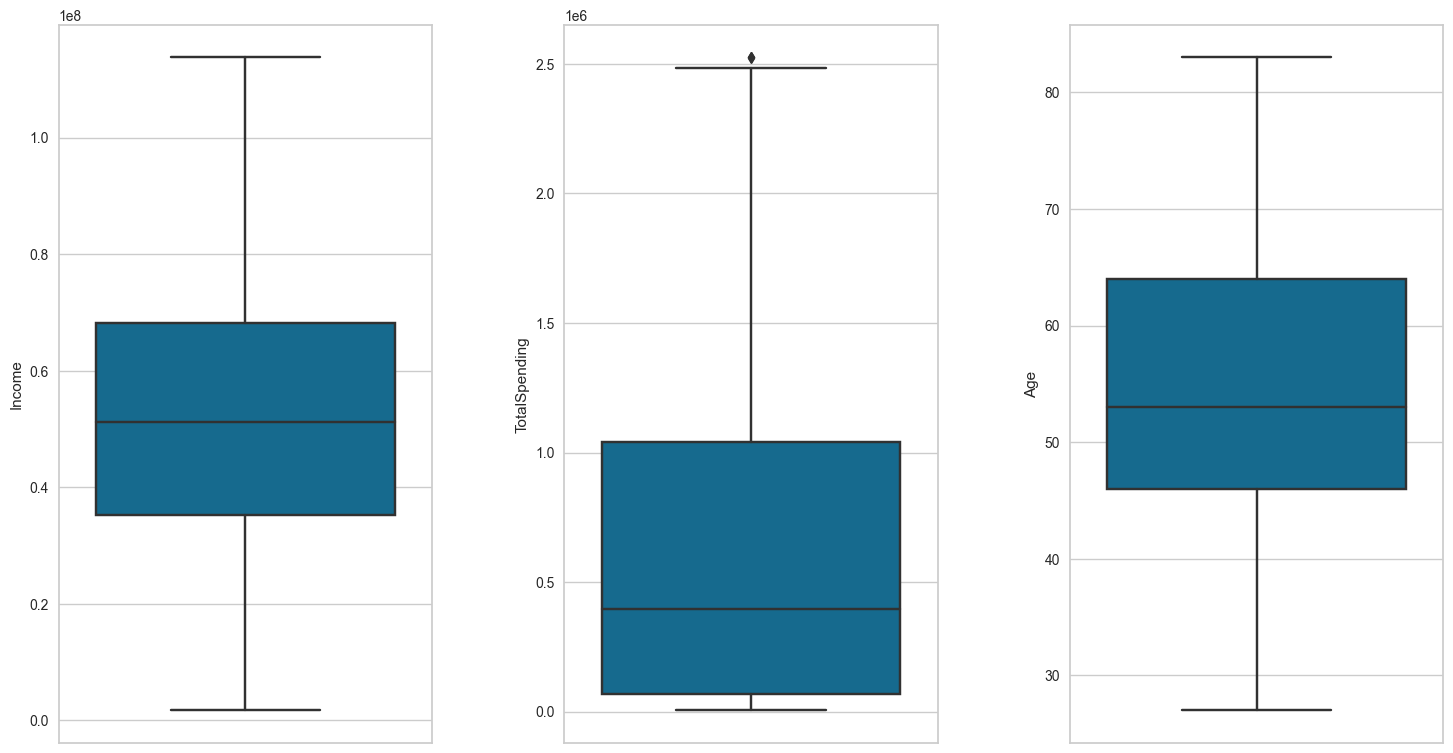

In [434]:
# Recheck outliers
plt.figure(figsize=(16, 9))
cols = ['Income', 'TotalSpending', 'Age']

for i in range(0, len(cols)):
    plt.subplot(1, 3, i+1)
    sns.boxplot(y=df[cols[i]])
    plt.tight_layout(pad=5)

✅ Fitur `Income` dan `Age` sudah bersih dari _outliers_.

### Conversion Rate Analysis

#### `ConversionRate` vs. `AgeGroup`

In [435]:
conversion_rate = df.groupby('AgeGroup')['ConversionRate'].mean().round(2).reset_index()
conversion_rate

,AgeGroup,ConversionRate
0,Dewasa,4.45
1,Lansia,5.30
2,Pralansia,3.74


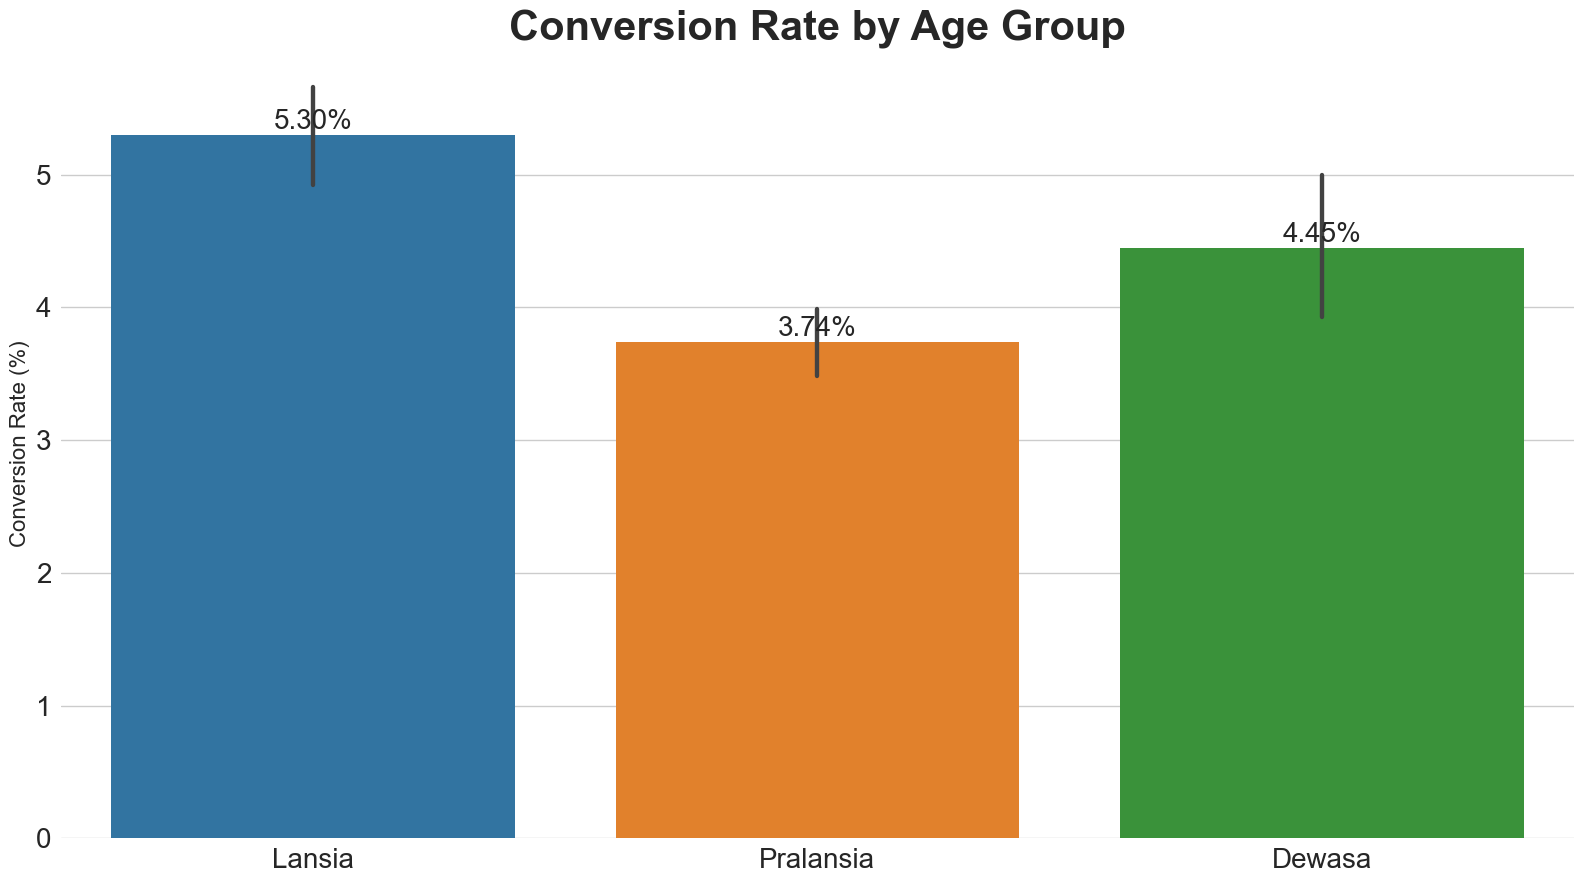

In [436]:
fig, ax = plt.subplots()
fig.set_size_inches(16, 9)
ax.spines[['top', 'right', 'bottom', 'left']].set_visible(False)

ax = sns.barplot(x='AgeGroup',
                 y='ConversionRate',
                 data=df, palette='tab10')

plt.title('Conversion Rate by Age Group', weight='bold', fontsize=30)
plt.bar_label(ax.containers[0], fmt='%.2f%%', fontsize=20)
plt.xlabel('')
plt.ylabel('Conversion Rate (%)', fontsize=16)
plt.tick_params(axis='both', labelsize=20)
plt.tight_layout()
plt.show()

🔎 Insights
- Kelompok `Lansia` memiliki rata-rata _conversion rate_ yang terbesar, yaitu 5,3%, lalu diikuti oleh kelompok `Dewasa` (4,5%) dan `Pralansia` (3,7).

#### `ConversionRate` vs. `Income`, `TotalSpending`, and `Age`

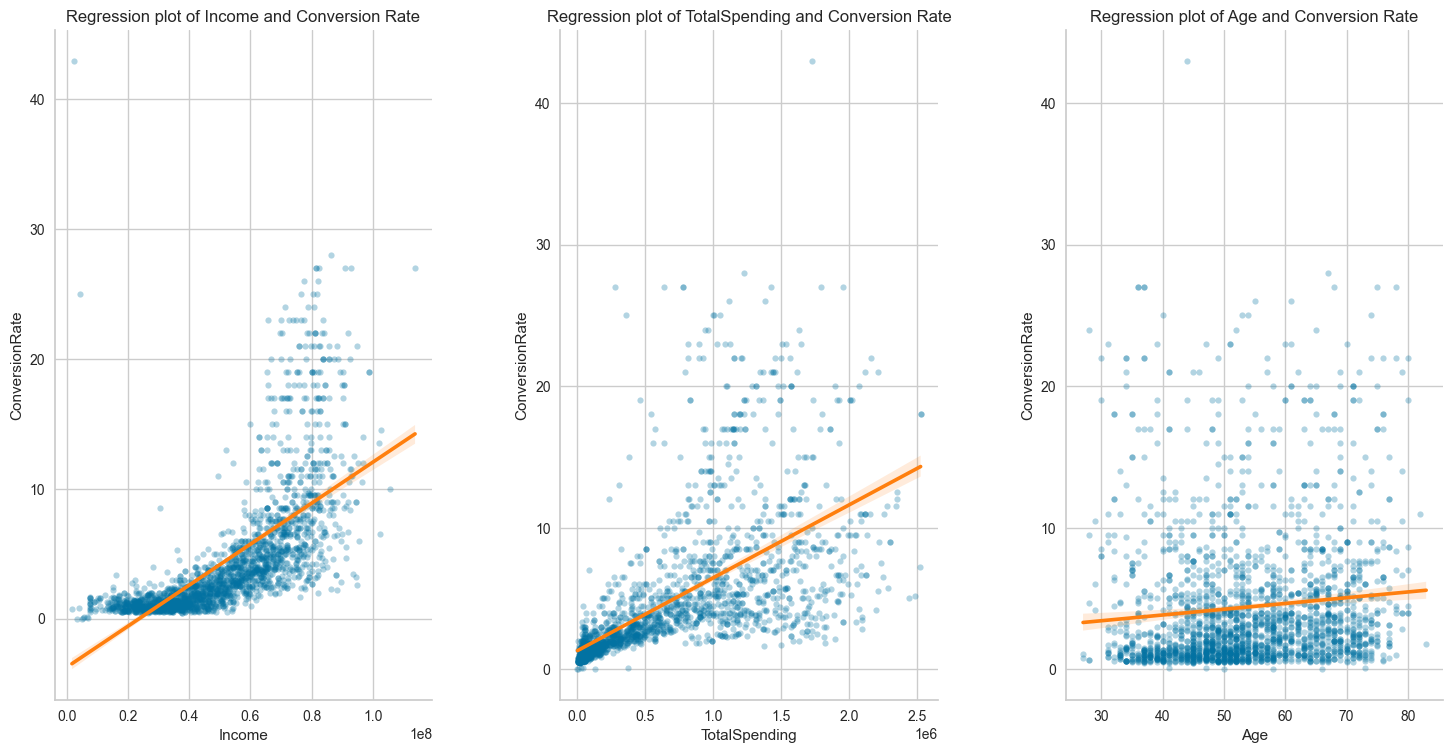

In [437]:
variable = ['Income', 'TotalSpending', 'Age']

plt.figure(figsize=(16, 9))
for var in range(0, len(variable)):
    plt.subplot(1, 3, var+1)
    sns.regplot(x=df[variable[var]], y='ConversionRate', data=df, scatter_kws={'s':20, 'alpha':0.3}, 
                line_kws={'color':'tab:orange'}).set(title=f'Regression plot of {variable[var]} and Conversion Rate')
    sns.despine()
    plt.tight_layout(pad=5)

🔎 Insights
- Secara umum, `Income` (pendapatan) dan `TotalSpending` (pengeluaran) berkorelasi positif terhadap `ConversionRate`.
- Makin tinggi pendapatan dan pengeluaran seseorang, makin besar kemungkinan mereka melakukan konversi pembelian.
- Perusahaan dapat mempertimbangkan target audiens dengan pendapatan dan pengeluaran yang lebih tinggi saat mengoptimalkan strategi pemasaran mereka.
- Fitur `Age` (usia) cenderung tidak berkorelasi yang signifikan terhadap `ConversionRate`.

#### `Age` vs. `Income` and `TotalSpending`

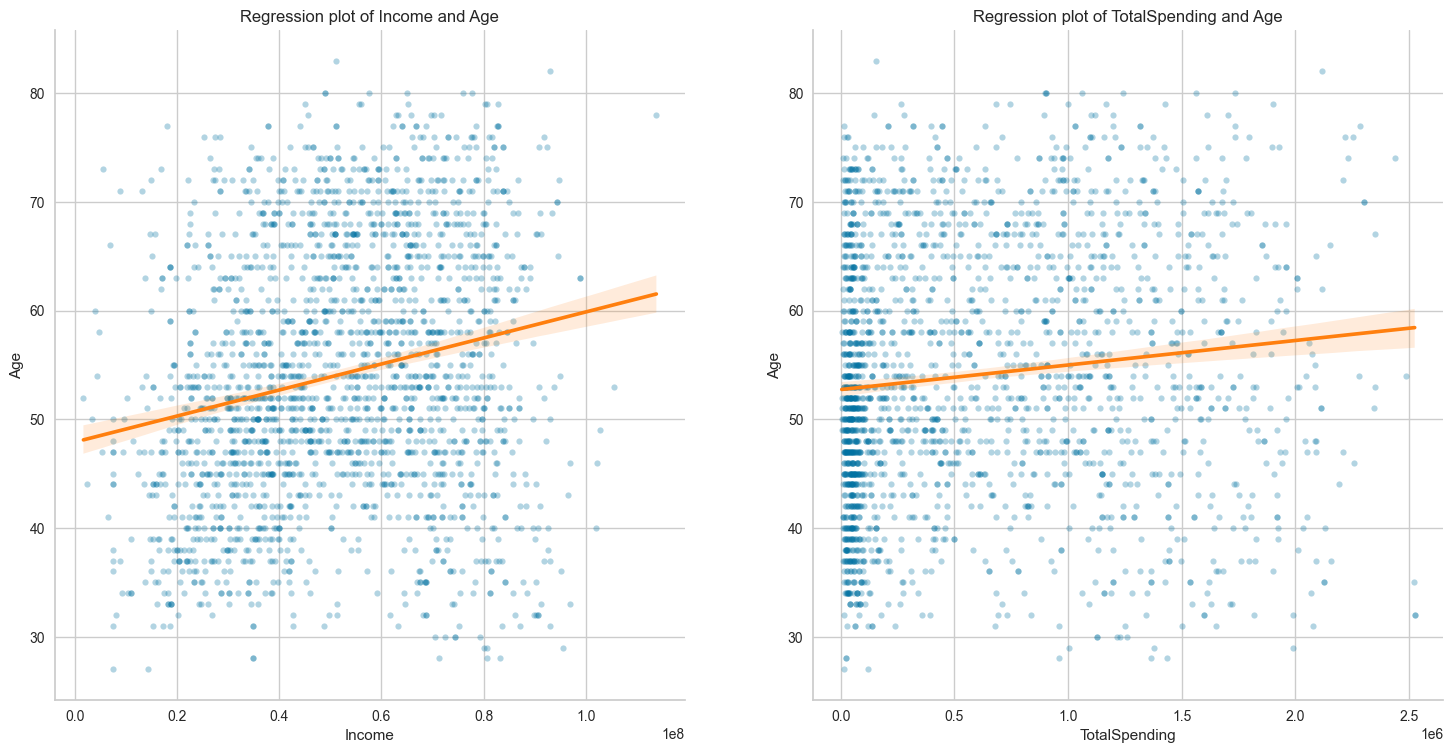

In [438]:
variable = ['Income', 'TotalSpending']

plt.figure(figsize=(16, 9))
for var in range(0, len(variable)):
    plt.subplot(1, 2, var+1)
    sns.regplot(x=df[variable[var]], y='Age', data=df, scatter_kws={'s':20, 'alpha':0.3}, 
                line_kws={'color':'tab:orange'}).set(title=f'Regression plot of {variable[var]} and Age')
    sns.despine()
    plt.tight_layout(pad=5)

🔎 Insights
- Terdapat korelasi positif yang lemah antara usia dan pendapatan ataupun pengeluaran.
- Meskipun korelasi yang lemah, perusahaan perlu mempertimbangkan faktor usia untuk mengembangkan strategi pemasaran yang lebih efektif dalam menjangkau dan memenuhi kebutuhan beragam kelompok usia.

#### `Income` vs. `TotalSpending`

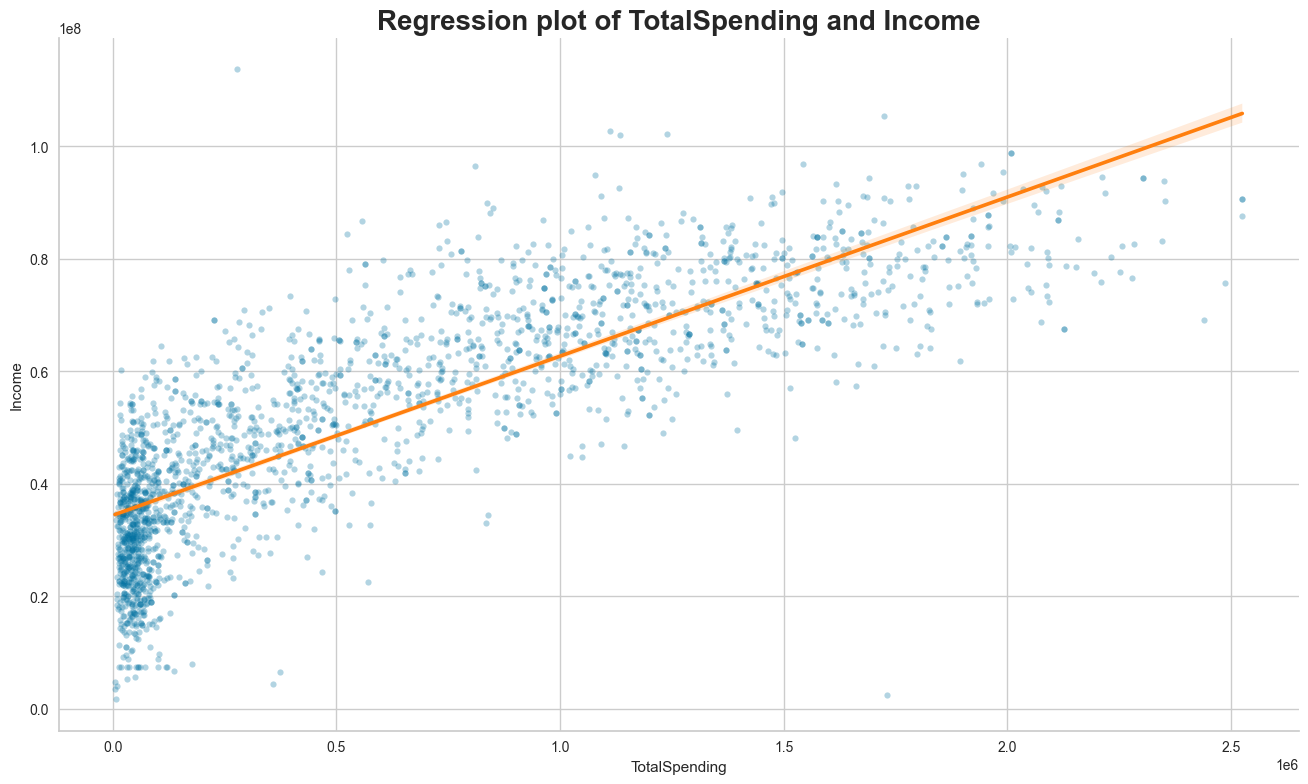

In [439]:
plt.figure(figsize=(16, 9))
sns.regplot(x='TotalSpending', y='Income', data=df, scatter_kws={'s':20, 'alpha':0.3},
            line_kws={'color':'tab:orange'})
sns.despine()

plt.title('Regression plot of TotalSpending and Income', weight='bold', fontsize=20)
plt.show()

🔎 Insights
- Terdapat korelasi positif yang kuat antara pendapatan dan pengeluaran.
- Makin tinggi pendapatan seseorang, makin besar kemungkinan jumlah uang yang dikeluarkan.

### Correlation Matrix

In [440]:
features = ['Income', 'Recency', 'Age', 'MembershipYear', 'TotalChildren', 'TotalSpending', 'TotalPurchasing', 'TotalAcceptedCampaigns', 'ConversionRate']

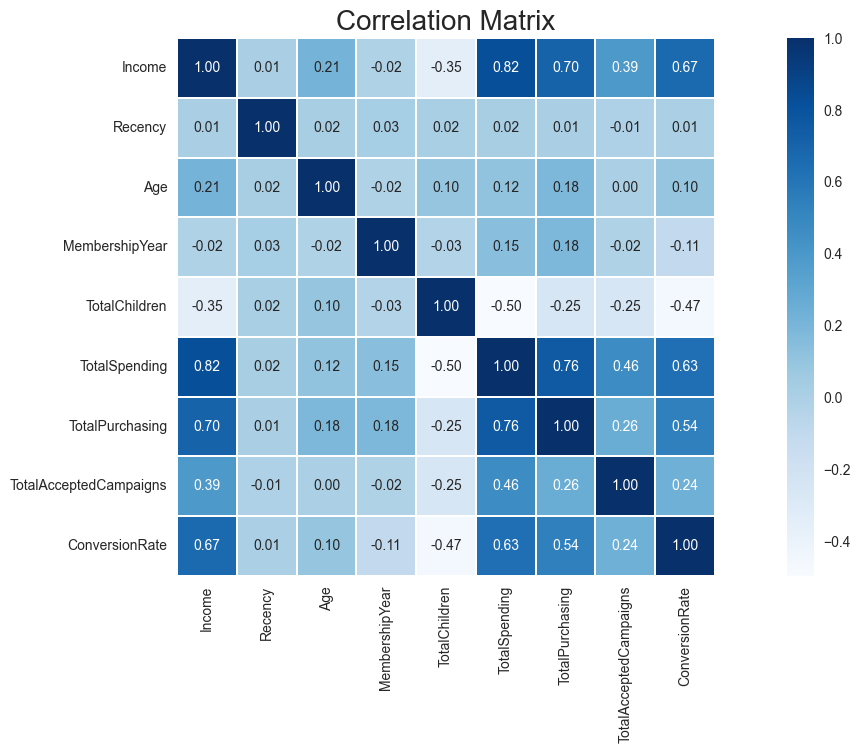

In [441]:
# Correlation plot
plt.figure(figsize=(16, 9))
corrmat = df[features].corr()
sns.heatmap(corrmat, cmap='Blues', annot=True, fmt='.2f', vmin=corrmat.values.min(), vmax=1, square=True, linewidths=0.1, annot_kws={'fontsize':10})
plt.title('Correlation Matrix', fontsize=20)
plt.tight_layout(pad=5)
plt.show()

🔎 Insights
- Fitur `Income`, `TotalSpending`, dan `TotalPurchasing` berkorelasi positif terhadap `ConversionRate`.

### Multivariate Analysis

In [442]:
features = ['Income', 'TotalSpending', 'AgeGroup', 'ConversionRate']

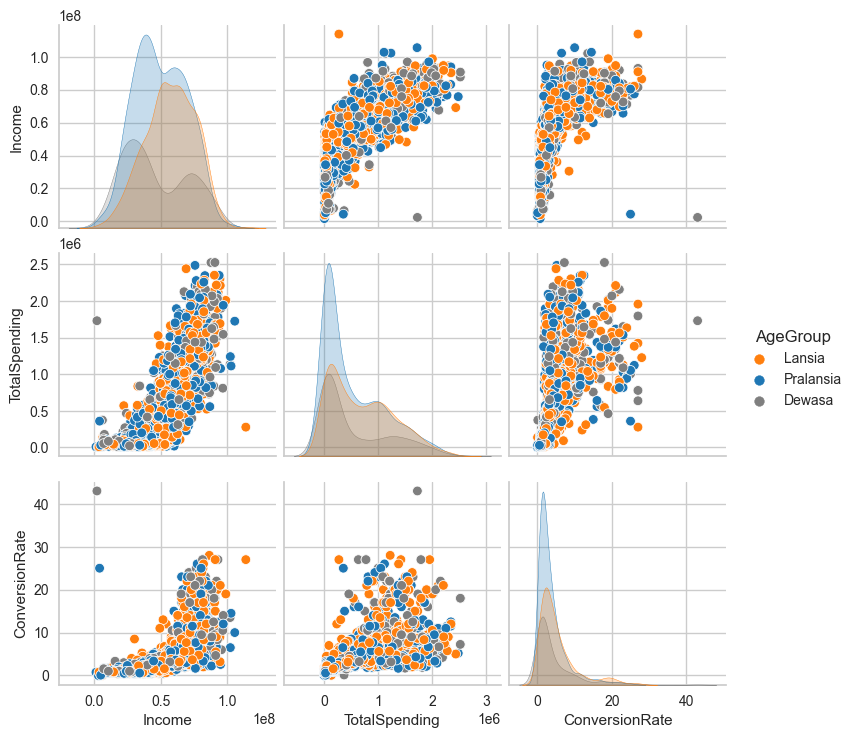

In [443]:
sns.pairplot(df[features], hue='AgeGroup', palette=['tab:orange', 'tab:blue', 'tab:gray'])
plt.show()

🔎 Insights
- Pada fitur `Income`, `TotalSpending`, ataupun `ConversionRate`, tidak terlihat adanya pola yang jelas di kelompok usia.
- Pola distribusi usia menunjukkan adanya keberagaman yang relatif merata, tanpa kelompok usia yang signifikan. Artinya, usia mungkin bukan faktor dominan yang secara signifikan memengaruhi hubungan antara pendapatan, pengeluaran, dan tingkat konversi.

## Data Cleaning

### Detect Missing Values

In [444]:
# Check the features that have missing values
print(df.isna().values.any())

# Summarize missing value
total = df.isna().sum().sort_values(ascending=False)
percent = round(df.isna().mean() * 100, 2).sort_values(ascending=False)

na = pd.concat([total, percent], axis=1, keys=['Total', 'Percentage (%)'])
na = na[na['Total'] > 0]
na.reset_index(inplace=True)
na.rename(columns={'index': 'Feature Name'}, inplace=True)
na

True


,Feature Name,Total,Percentage (%)
0,Income,23,1.04


<Figure size 1600x900 with 0 Axes>

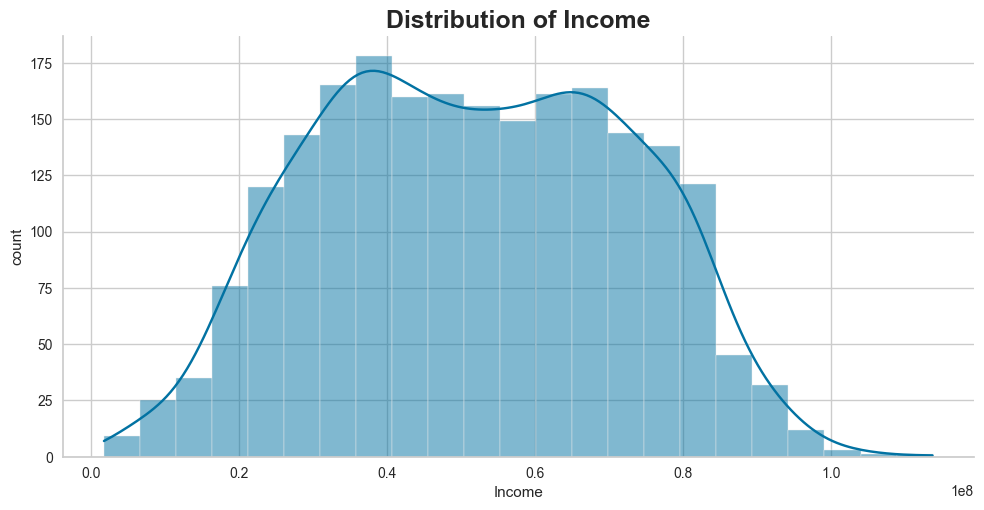

In [445]:
# Check the distribution for 'Income'
plt.figure(figsize=(16, 9))
sns.displot(df['Income'], kde=True, height=5, aspect=2)
plt.title('Distribution of Income', weight='bold', fontsize=18)
plt.ylabel('count')

plt.show()

🔎 Observasi
- Fitur `Income` memiliki _missing values_ sebanyak 24 atau 1,07% dan kita akan mengganti nilai tersebut dengan median, bukan mean, karena memiliki distribusi _positively skewed_ atau menceng kanan.

In [446]:
# Fill missing values with median
df['Income'].fillna(df['Income'].median(), inplace=True)

# Recheck
df.isna().sum().sum()

0

✅ Dataset sudah bersih dari _missing values_.

### Detect Duplicate Values

In [447]:
# Check the features that have duplicate values
print(df.duplicated().any())
df.duplicated().sum()

True


183

🔎 Observasi
- Dataset memiliki 183 baris data yang duplikat.

In [448]:
# Drop duplicate values
df.drop_duplicates(inplace=True)

# Recheck
df.duplicated().sum()

0

In [449]:
df.shape[0]

2039

✅ Dataset sudah bebas dari _duplicate values_.

### Number of Unique Classes

In [450]:
# Count number of unique class
df.nunique().sort_values(ascending=False)

Income                    1957
TotalSpending             1047
CokeSpending               775
CustomerDate               662
MeatSpending               552
GoldSpending               212
FishSpending               180
ConversionRate             178
SweetSpending              177
FruitSpending              158
Recency                    100
Age                         56
BirthYear                   56
TotalPurchasing             37
NumWebVisitsMonth           15
NumDealsPurchases           15
NumWebPurchases             14
NumStorePurchases           14
NumCatalogPurchases         13
MaritalStatus                6
Education                    5
TotalAcceptedCampaigns       5
TotalChildren                4
NumKids                      3
MembershipYear               3
AgeGroup                     3
NumTeenagers                 3
Response                     2
AcceptedCampaign2            2
AcceptedCampaign1            2
AcceptedCampaign5            2
AcceptedCampaign4            2
Accepted

In [451]:
values = {'Feature Name': [], 'Unique Classes': []}
for col in df.columns:
    values['Feature Name'].append(col)
    values['Unique Classes'].append(df[col].unique())
    
unique = pd.DataFrame(values)
unique

,Feature Name,Unique Classes
0,BirthYear,"[1957, 1954, 1965, 1984, 1981, 1967, 1971, 198..."
1,Education,"[S1, S3, S2, SMA, D3]"
2,MaritalStatus,"[Lajang, Bertunangan, Menikah, Cerai, Janda, D..."
3,Income,"[58138000.0, 46344000.0, 71613000.0, 26646000...."
4,NumKids,"[0, 1, 2]"
5,NumTeenagers,"[0, 1, 2]"
6,CustomerDate,"[2012-09-04 00:00:00, 2014-03-08 00:00:00, 201..."
7,Recency,"[58, 38, 26, 94, 16, 34, 32, 19, 68, 11, 59, 8..."
8,CokeSpending,"[635000, 11000, 426000, 173000, 520000, 235000..."
9,FruitSpending,"[88000, 1000, 49000, 4000, 43000, 42000, 65000..."


🔽 `MaritalStatus`

In [452]:
df['MaritalStatus'].value_counts()

MaritalStatus
Menikah        791
Bertunangan    513
Lajang         448
Cerai          214
Janda           70
Duda             3
Name: count, dtype: int64

🔎 Observasi
- Terdapat kategori yang tidak tepat, seperti:
    - `Lajang` dan `Bertunangan` → `Belum Kawin`,
    - `Menikah` → `Kawin`, dan
    - `Janda` dan `Duda` → `Cerai`

In [453]:
# Fix incorrect values
df['MaritalStatus'] = df['MaritalStatus'].replace({
    'Lajang'     : 'Belum Kawin',
    'Bertunangan': 'Belum Kawin',
    'Menikah'    : 'Kawin',
    'Janda'      : 'Cerai',
    'Duda'       : 'Cerai'
})
df['MaritalStatus'].value_counts()

MaritalStatus
Belum Kawin    961
Kawin          791
Cerai          287
Name: count, dtype: int64

🔽 `ContactingCost` dan `Revenue`

🔎 Observasi
- Fitur `ContactingCost` dan `Revenue` masing-masing hanya memiliki 1 kategori, sehingga dapat dihapus.

In [454]:
# Drop 'ContactingCost' and 'Revenue' features
df.drop(columns=['ContactingCost', 'Revenue'], inplace=True)

### Handle Outliers

🔽 `NumWebPurchases` dan `NumCatalogPurchases`

In [455]:
columns = ['NumWebPurchases', 'NumCatalogPurchases']

In [456]:
# Handle outliers with IQR (Interquartile Range)
print(f'Jumlah baris sebelum menghapus outlier: {len(df)}')

filtered_entries = np.array([True] * len(df))
for col in columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((df[col] >= low_limit) & (df[col] <= high_limit)) & filtered_entries
    
df = df[filtered_entries]

print(f'Jumlah baris sesudah menghapus outlier: {len(df)}')

Jumlah baris sebelum menghapus outlier: 2039
Jumlah baris sesudah menghapus outlier: 2017


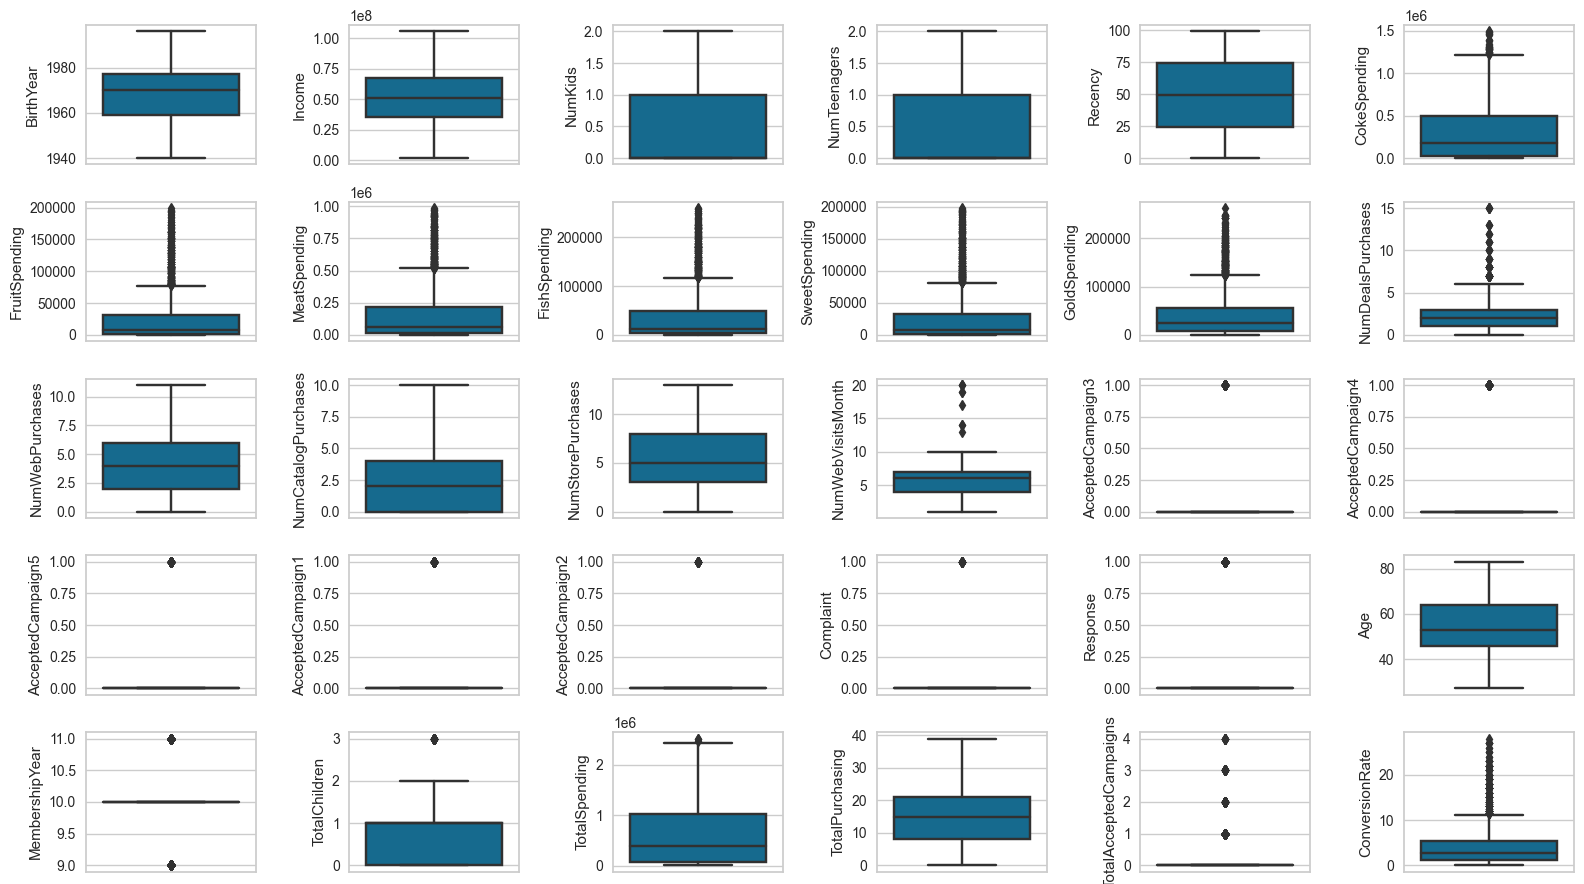

In [457]:
plt.figure(figsize=(16, 9))
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

for i in range(0, len(num_cols)):
    plt.subplot(5, 6, i+1)
    sns.boxplot(y=df[num_cols[i]])
    plt.tight_layout()

✅ Sebagian besar _outliers_ atau pencilan di dalam dataset sudah dihilangkan.

### Feature Encoding

In [458]:
cat_cols = df.select_dtypes(include=['object']).columns
cat_cols

Index(['Education', 'MaritalStatus', 'AgeGroup'], dtype='object')

🔽 `Education`

In [459]:
from sklearn.preprocessing import OrdinalEncoder

level = ['SMA', 'D3', 'S1', 'S2', 'S3']
label = [0, 1, 2, 3, 4]

order = OrdinalEncoder(categories=[level], dtype=int)

df['Education'] = order.fit_transform(df[['Education']])

🔽 `MaritalStatus` dan `AgeGroup`

In [460]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

df['MaritalStatus'] = encoder.fit_transform(df['MaritalStatus'])
df['AgeGroup'] = encoder.fit_transform(df['AgeGroup'])

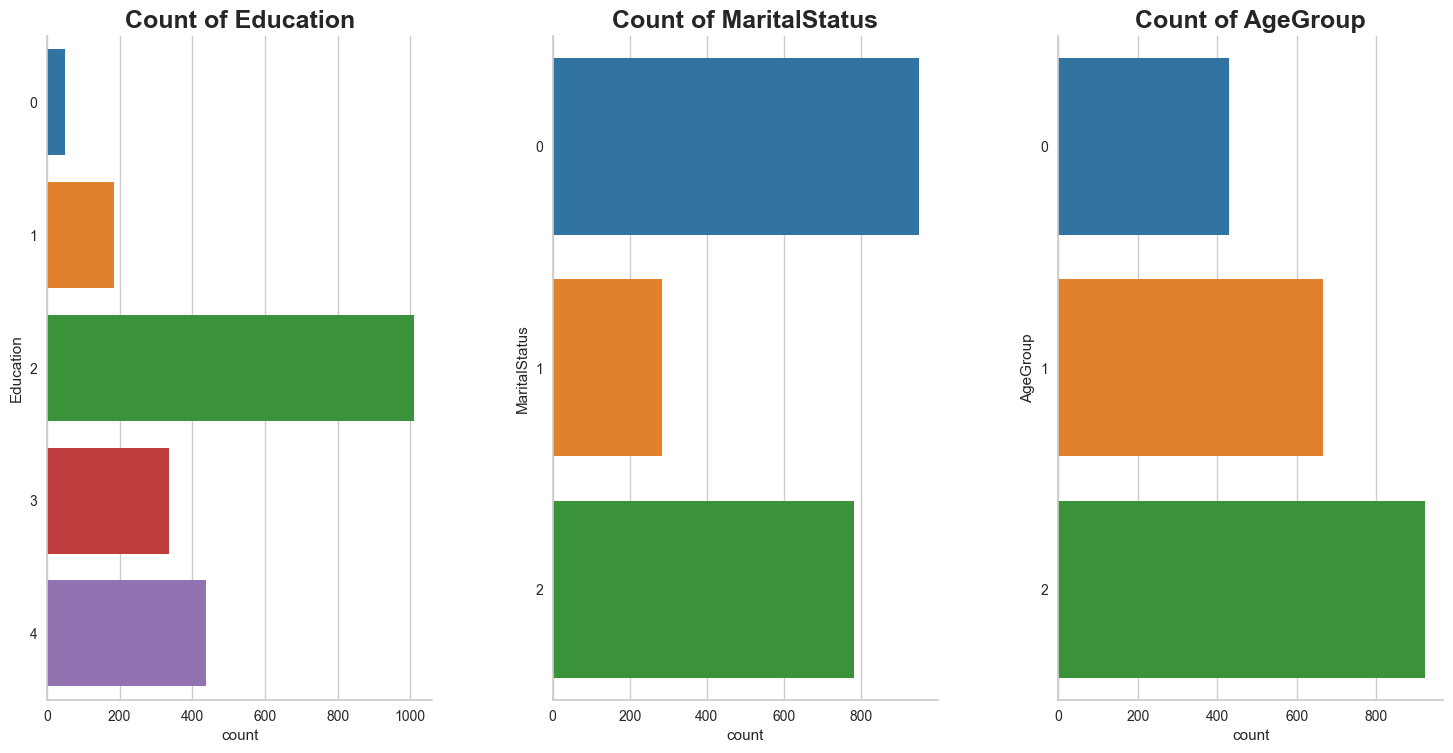

In [461]:
plt.figure(figsize=(16, 9))
for i in range(0, len(cat_cols)):
    plt.subplot(1, 3, i+1)
    ax = sns.countplot(y=df[cat_cols[i]], palette='tab10')
    plt.title(f'Count of {cat_cols[i]}', fontsize=18, weight='bold')
    sns.despine()
    plt.tight_layout(pad=5)

plt.show()

### Feature Scaling: Standardization

In [462]:
df_std = df.copy()
df_std = df_std.drop(columns=['BirthYear', 'CustomerDate', 'Age', 'MembershipYear'])

In [463]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaled_data = scaler.fit_transform(df_std)
scaled_df = pd.DataFrame(scaled_data, columns=df_std.columns)
scaled_df.sample(5)

,Education,MaritalStatus,Income,NumKids,NumTeenagers,Recency,CokeSpending,FruitSpending,MeatSpending,FishSpending,SweetSpending,GoldSpending,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCampaign3,AcceptedCampaign4,AcceptedCampaign5,AcceptedCampaign1,AcceptedCampaign2,Complaint,Response,AgeGroup,TotalChildren,TotalSpending,TotalPurchasing,TotalAcceptedCampaigns,ConversionRate
1531,-0.458305,0.090765,0.662914,-0.838278,0.889467,0.967195,0.668137,-0.046048,0.322794,-0.092853,-0.069108,0.435466,-0.181487,0.732985,0.553747,1.927896,-0.578987,-0.280374,-0.290532,-0.274153,-0.262474,-0.114275,-0.097517,-0.420451,0.967417,0.045772,0.511736,1.227497,-0.442657,0.369442
134,1.531795,0.090765,-0.763035,1.017712,0.889467,-0.413950,-0.855799,-0.660291,-0.716471,-0.606816,-0.605979,-0.459171,-0.181487,-1.168289,-0.586730,-1.177244,-0.161910,3.566663,-0.290532,-0.274153,-0.262474,-0.114275,-0.097517,2.378396,0.967417,1.383786,-0.916438,-1.160793,1.042932,-0.658598
102,-0.458305,1.174031,-0.112929,1.017712,0.889467,-1.173580,-0.471839,-0.634697,-0.604118,-0.643527,-0.630382,-0.717622,0.881095,-0.027525,-0.586730,-0.556216,0.672246,-0.280374,-0.290532,-0.274153,-0.262474,-0.114275,-0.097517,-0.420451,0.967417,1.383786,-0.685386,-0.232014,-0.442657,-0.517243
1107,0.536745,1.174031,0.752994,1.017712,0.889467,0.414737,0.138331,-0.481137,-0.590074,-0.680239,-0.654785,0.077611,0.349804,1.493495,-0.206571,-0.556216,0.672246,-0.280374,3.441967,-0.274153,-0.262474,-0.114275,-0.097517,-0.420451,-0.312111,1.383786,-0.265137,0.298717,1.042932,-0.395163
693,-0.458305,-0.992502,1.890776,-0.838278,-0.941202,-1.104522,0.325847,-0.097235,-0.135980,0.402754,0.028505,2.781402,-0.712778,2.634259,1.314065,0.685840,-0.578987,-0.280374,-0.290532,3.647597,-0.262474,-0.114275,-0.097517,-0.420451,-1.591639,-1.292241,0.401233,1.492862,1.042932,0.476529


In [464]:
scaled_df.describe()

,Education,MaritalStatus,Income,NumKids,NumTeenagers,Recency,CokeSpending,FruitSpending,MeatSpending,FishSpending,SweetSpending,GoldSpending,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCampaign3,AcceptedCampaign4,AcceptedCampaign5,AcceptedCampaign1,AcceptedCampaign2,Complaint,Response,AgeGroup,TotalChildren,TotalSpending,TotalPurchasing,TotalAcceptedCampaigns,ConversionRate
count,2.017000e+03,2.017000e+03,2.017000e+03,2.017000e+03,2.017000e+03,2.017000e+03,2.017000e+03,2.017000e+03,2.017000e+03,2.017000e+03,2.017000e+03,2.017000e+03,2.017000e+03,2.017000e+03,2.017000e+03,2017.000000,2.017000e+03,2.017000e+03,2.017000e+03,2.017000e+03,2.017000e+03,2.017000e+03,2.017000e+03,2.017000e+03,2.017000e+03,2.017000e+03,2.017000e+03,2.017000e+03,2.017000e+03,2.017000e+03
mean,-4.931878e-17,1.232970e-17,-1.307828e-16,3.522770e-17,-8.454648e-17,4.755740e-17,-6.385021e-17,3.522770e-17,-1.232970e-17,-3.963116e-17,1.056831e-17,9.511479e-17,3.698909e-17,9.687618e-17,-7.045540e-17,0.000000,3.346632e-17,-8.806925e-17,-3.346632e-17,-2.994355e-17,-1.761385e-17,-2.465939e-17,-1.849454e-17,-1.761385e-17,3.610839e-17,-6.693263e-17,-2.950320e-17,-1.043621e-16,-5.284155e-17,2.818216e-17
std,1.000248e+00,1.000248e+00,1.000248e+00,1.000248e+00,1.000248e+00,1.000248e+00,1.000248e+00,1.000248e+00,1.000248e+00,1.000248e+00,1.000248e+00,1.000248e+00,1.000248e+00,1.000248e+00,1.000248e+00,1.000248,1.000248e+00,1.000248e+00,1.000248e+00,1.000248e+00,1.000248e+00,1.000248e+00,1.000248e+00,1.000248e+00,1.000248e+00,1.000248e+00,1.000248e+00,1.000248e+00,1.000248e+00,1.000248e+00
min,-2.448406e+00,-9.925018e-01,-2.439379e+00,-8.382784e-01,-9.412016e-01,-1.691509e+00,-9.004458e-01,-6.602907e-01,-7.539221e-01,-6.802389e-01,-6.547853e-01,-8.567873e-01,-1.244069e+00,-1.548544e+00,-9.668896e-01,-1.798272,-1.830220e+00,-2.803741e-01,-2.905316e-01,-2.741531e-01,-2.624737e-01,-1.142750e-01,-9.751671e-02,-4.204515e-01,-1.591639e+00,-1.292241e+00,-9.901075e-01,-1.956890e+00,-4.426567e-01,-9.156078e-01
25%,-4.583052e-01,-9.925018e-01,-7.836145e-01,-8.382784e-01,-9.412016e-01,-8.628221e-01,-8.319877e-01,-6.346972e-01,-6.790200e-01,-6.251715e-01,-6.303821e-01,-6.778600e-01,-7.127780e-01,-7.880342e-01,-9.668896e-01,-0.866730,-5.789872e-01,-2.803741e-01,-2.905316e-01,-2.741531e-01,-2.624737e-01,-1.142750e-01,-9.751671e-02,-4.204515e-01,-3.121109e-01,-1.292241e+00,-8.846268e-01,-8.954278e-01,-4.426567e-01,-6.478892e-01
50%,-4.583052e-01,9.076451e-02,-7.132551e-03,-8.382784e-01,-9.412016e-01,3.937325e-04,-3.855219e-01,-4.555431e-01,-4.496326e-01,-4.599692e-01,-4.595596e-01,-3.796477e-01,-1.814871e-01,-2.752464e-02,-2.065713e-01,-0.245702,2.551679e-01,-2.803741e-01,-2.905316e-01,-2.741531e-01,-2.624737e-01,-1.142750e-01,-9.751671e-02,-4.204515e-01,-3.121109e-01,4.577240e-02,-3.538750e-01,3.335159e-02,-4.426567e-01,-3.587531e-01
75%,5.367450e-01,1.174031e+00,7.870313e-01,1.017712e+00,8.894673e-01,8.636095e-01,5.937265e-01,1.586997e-01,2.619366e-01,2.191959e-01,1.505208e-01,2.366576e-01,3.498038e-01,7.329849e-01,5.537469e-01,0.685840,6.722455e-01,-2.803741e-01,-2.905316e-01,-2.741531e-01,-2.624737e-01,-1.142750e-01,-9.751671e-02,-4.204515e-01,9.674168e-01,4.577240e-02,7.210231e-01,8.294482e-01,-4.426567e-01,2.088105e-01
max,1.531795e+00,1.174031e+00,2.656010e+00,2.873703e+00,2.720136e+00,1.726825e+00,3.543377e+00,4.432806e+00,3.852552e+00,4.073916e+00,4.177051e+00,4.351987e+00,6.725295e+00,2.634259e+00,2.834702e+00,2.238410,6.094254e+00,3.566663e+00,3.441967e+00,3.647597e+00,3.809906e+00,8.750824e+00,1.025465e+01,2.378396e+00,9.674168e-01,2.721799e+00,3.229119e+00,3.217738e+00,5.499696e+00,5.081290e+00


# Data Modeling

In [465]:
df_model = scaled_df.copy()

## Klasterisasi Menggunakan _Principal Component Analysis_ (PCA)

In [466]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 4)
pca.fit(df_model)
X_pca = pca.transform(df_model)

pdf = pd.DataFrame(X_pca, columns = ['pc1', 'pc2', 'pc3', 'pc4'])
pdf.describe()

,pc1,pc2,pc3,pc4
count,2.017000e+03,2.017000e+03,2.017000e+03,2.017000e+03
mean,1.021603e-16,-9.863756e-17,4.931878e-17,2.818216e-17
std,3.100262e+00,1.636041e+00,1.602729e+00,1.215191e+00
min,-5.247651e+00,-5.255103e+00,-4.174925e+00,-3.914980e+00
25%,-2.801709e+00,-1.239886e+00,-7.654717e-01,-8.109561e-01
50%,-8.080404e-01,-2.318935e-01,-1.724671e-01,-9.430082e-02
75%,2.409905e+00,1.174236e+00,3.982606e-01,6.541604e-01
max,9.401854e+00,6.144246e+00,9.520301e+00,5.404488e+00


Explained variance: [9.61162659 2.67662917 2.56873754 1.47661225]
Explained variance ratio: [0.32022871 0.08917674 0.08558213 0.04919601]


<BarContainer object of 4 artists>

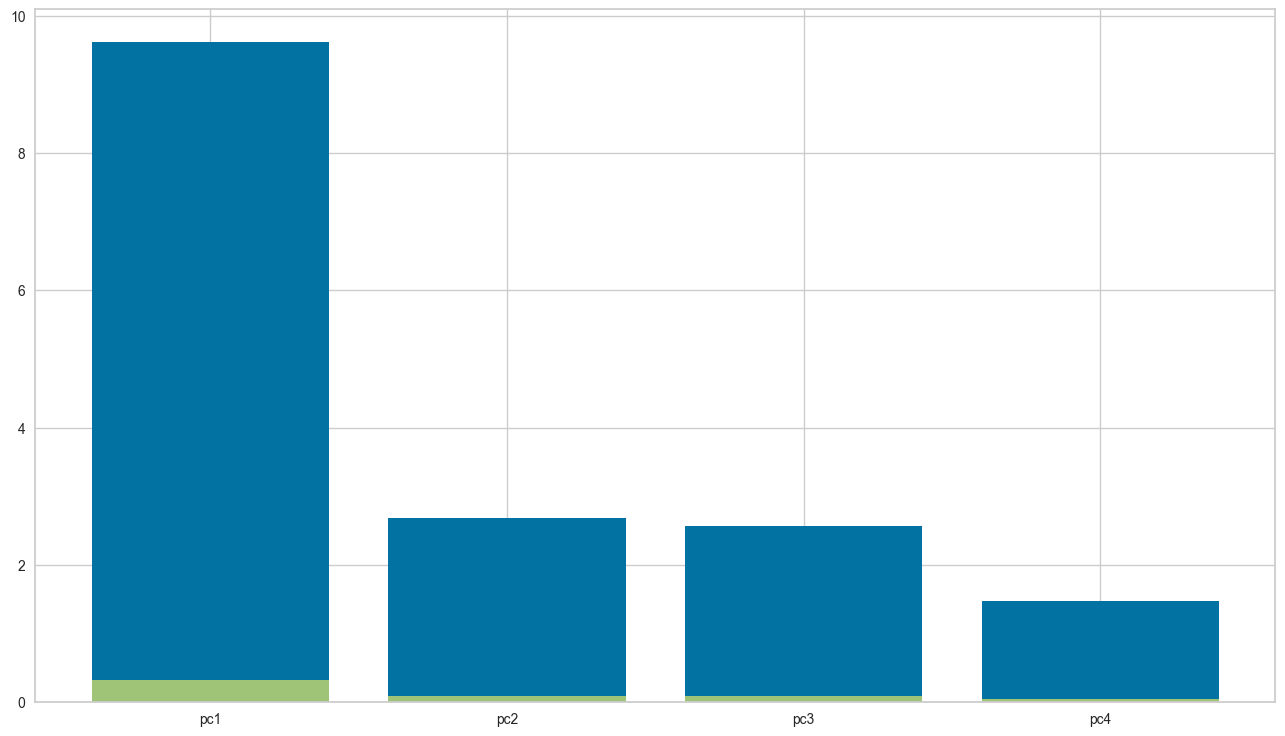

In [467]:
print('Explained variance:', pca.explained_variance_)
print('Explained variance ratio:', pca.explained_variance_ratio_)

plt.figure(figsize=(16, 9))
plt.bar(['pc1', 'pc2', 'pc3', 'pc4'], pca.explained_variance_)
plt.bar(['pc1', 'pc2', 'pc3', 'pc4'], pca.explained_variance_ratio_)

<Figure size 1600x900 with 0 Axes>

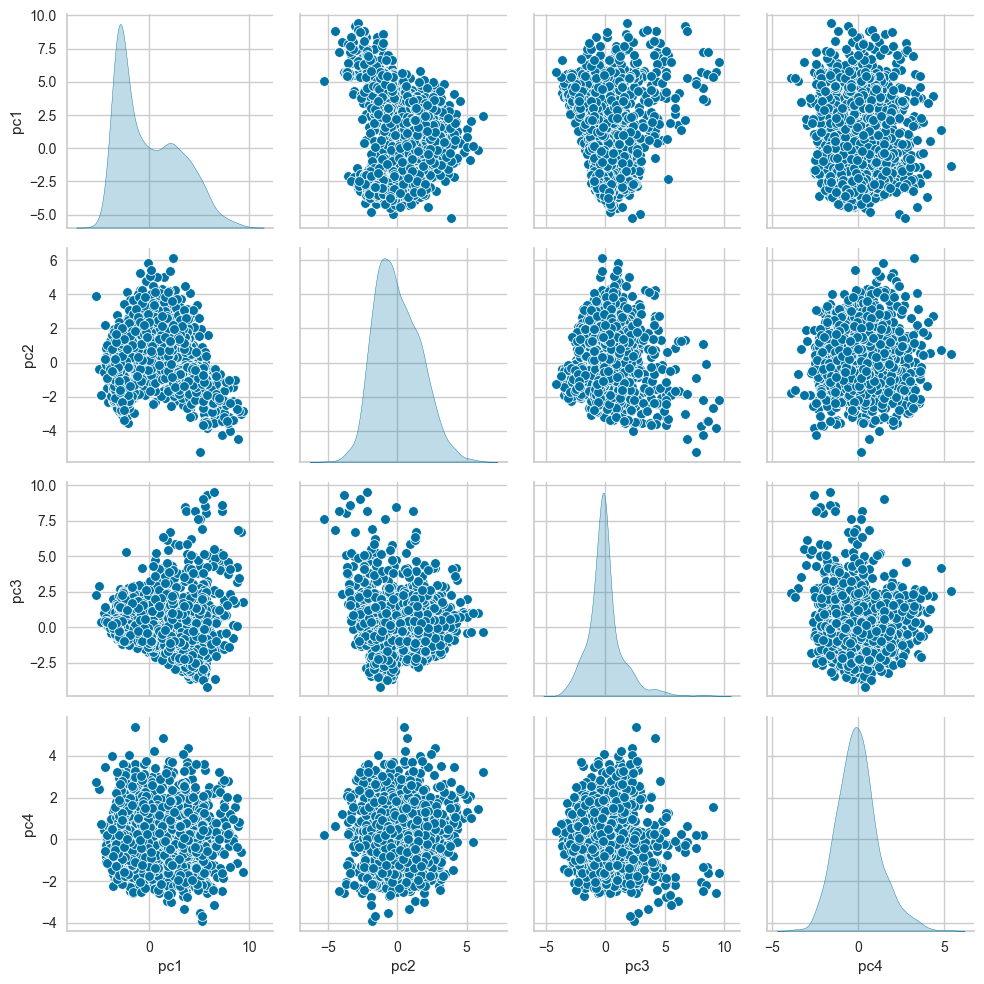

In [468]:
plt.figure(figsize=(16, 9))
sns.pairplot(pdf, diag_kind='kde')
plt.tight_layout()

### Inertia Score

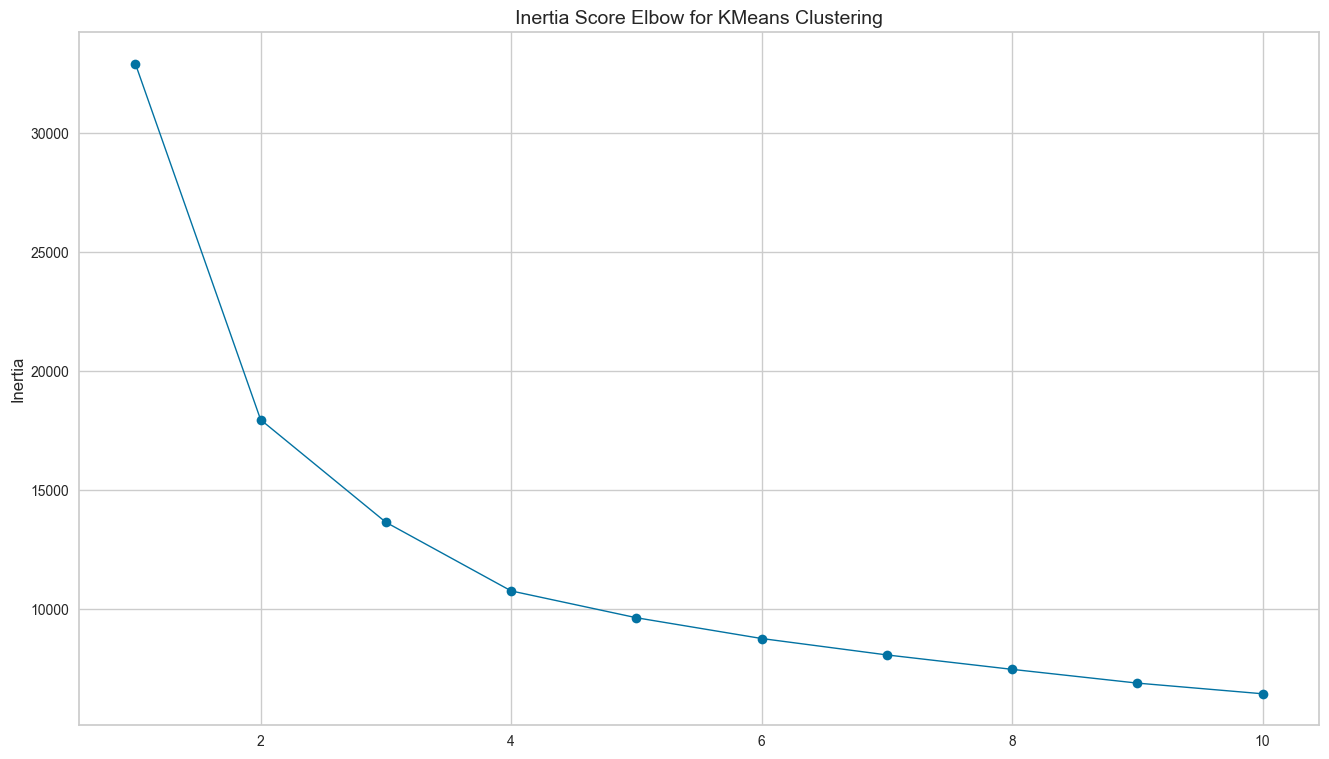

In [469]:
from sklearn.cluster import KMeans

# Menghitung nilai inertia untuk setiap k (dari 1 s.d. 10)
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10,
                    max_iter=200, random_state=100)
    kmeans.fit(pdf)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(16, 9))
plt.plot(range(1, 11),
         inertia,
         linewidth=1,
         marker='o')
plt.xlabel('', fontsize=12)
plt.ylabel('Inertia', fontsize=12)
plt.style.use('ggplot')
plt.title('Inertia Score Elbow for KMeans Clustering', fontsize=14)
plt.show()

In [470]:
from sklearn.cluster import KMeans

inertia = []

for i in range(1, 11) :
    kmeans = KMeans(n_clusters=i, random_state=100)
    kmeans.fit(df_model)
    inertia.append(kmeans.inertia_)

In [471]:
# Persentase dari inertia
(pd.Series(inertia) - pd.Series(inertia).shift(-1)) / pd.Series(inertia) * 100

0    24.771919
1     9.865463
2     7.284221
3     4.182635
4     5.358337
5     3.555633
6     3.656317
7     4.545564
8     2.970797
9          NaN
dtype: float64

### Distortion Score

In [472]:
# pip install yellowbrick

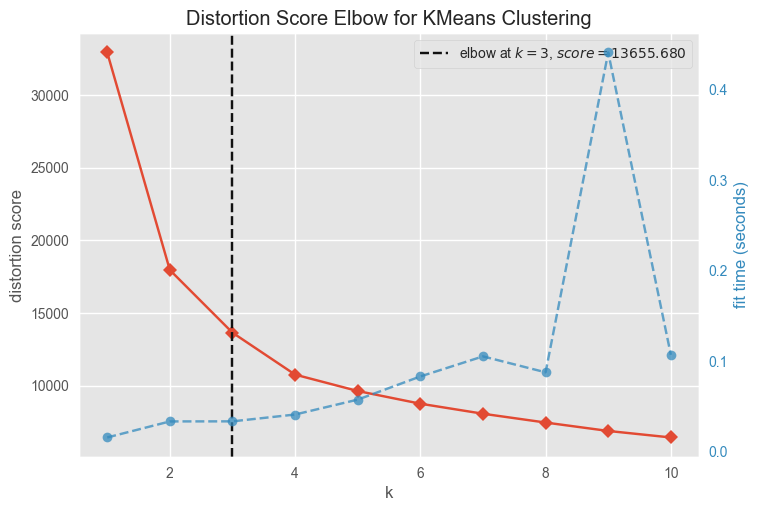

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [473]:
from yellowbrick.cluster import KElbowVisualizer

# Fit model
model = KMeans(init='k-means++', n_init=10, max_iter=200, random_state=100)
visualizer = KElbowVisualizer(model, k=(1, 11), metric='distortion', timings=True, locate_elbow=True)
visualizer.fit(pdf)
visualizer.show()

### Silhouette Score

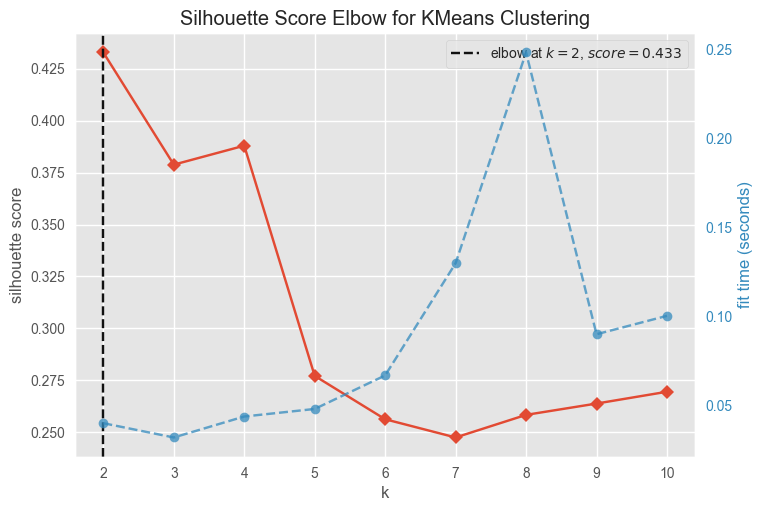

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [474]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(init='k-means++', n_init=10, max_iter=200, random_state=100)
visualizer = KElbowVisualizer(model, k=(2, 11), metric='silhouette', timings=True, locate_elbow=True)
visualizer.fit(pdf)
visualizer.show()

### Silhouette Plot

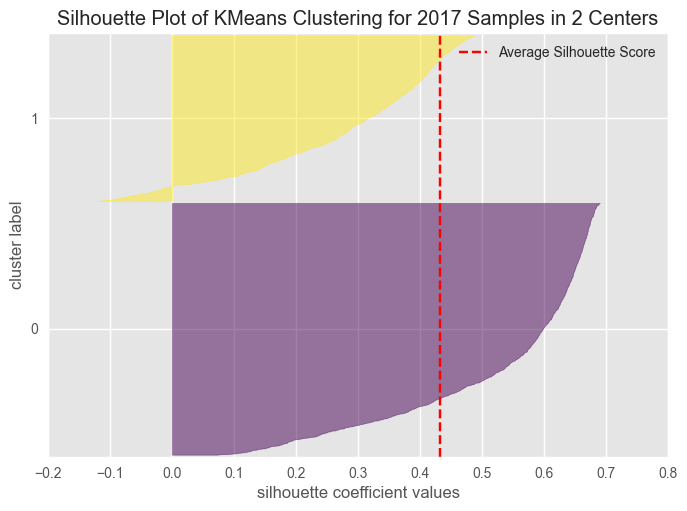

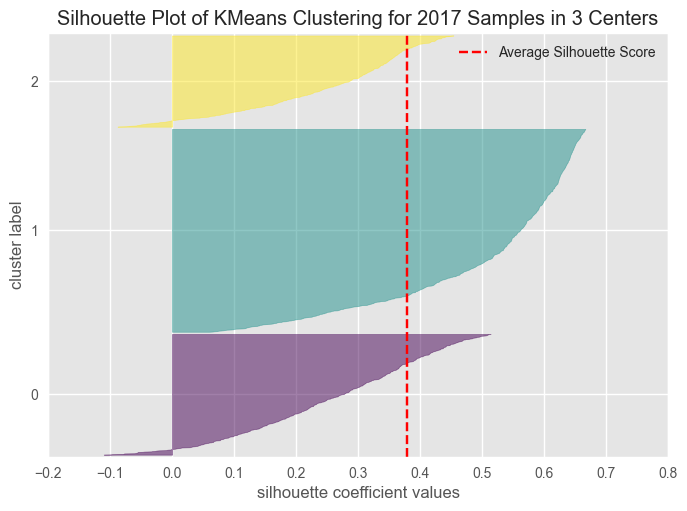

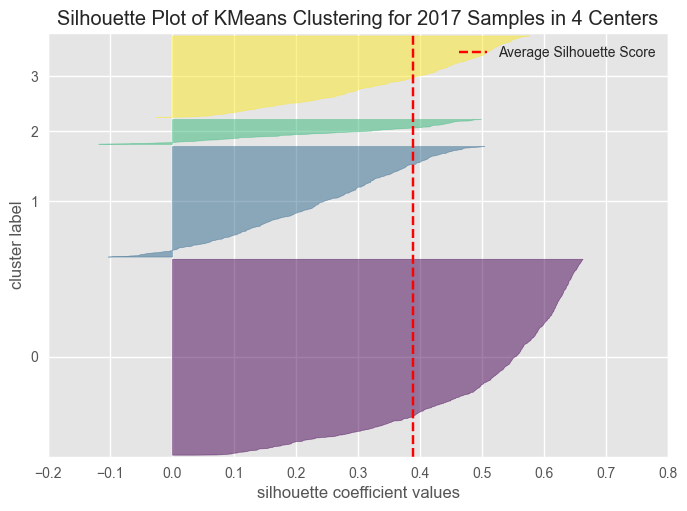

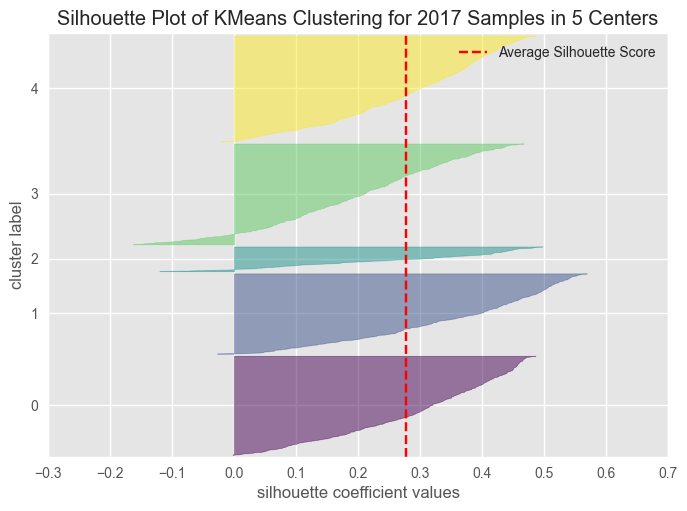

In [475]:
from yellowbrick.cluster import SilhouetteVisualizer

for i in [2, 3, 4, 5]:
    model = KMeans(i, init='k-means++', n_init=10, max_iter=200, random_state=100)
    visualizer = SilhouetteVisualizer(model, colors='viridis')
    visualizer.fit(pdf)        
    visualizer.show()

### K-Means Clustering

In [476]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=4,
            init='k-means++', # Mempercepat kovergensi
            n_init=10,
            max_iter=200,
            random_state=100)
km.fit(df_model.values)

KMeans(max_iter=200, n_clusters=4, n_init=10, random_state=100)

In [477]:
# Labels
df_model['labels'] = km.labels_
df_model.groupby('labels').agg(['std', 'mean', 'median'])

Education                     MaritalStatus                       
             std      mean    median           std      mean    median   
labels                                                                   
0       0.895082 -0.066810 -0.458305      0.993048 -0.072021 -0.992502  \
1       0.947274  0.232398 -0.458305      0.988693  0.086796  0.090765   
2       0.940520  0.128836 -0.458305      1.004589  0.036938  0.090765   
3       1.052255 -0.130487 -0.458305      1.006784 -0.028578  0.090765   

          Income                       NumKids                       
             std      mean    median       std      mean    median   
labels                                                               
0       0.450342  1.034335  1.038409  0.330964 -0.777426 -0.838278  \
1       0.502964  0.295404  0.310553  0.856343 -0.348786 -0.838278   
2       0.497244  1.461541  1.519210  0.379675 -0.757583 -0.838278   
3       0.605643 -0.821150 -0.825118  0.919205  0.632358  1.017712   

       NumTeenagers                       Recency                       
                std      mean    median       std      mean    median   
labels                                                                  
0          0.769643 -0.541055 -0.941202  1.015160  0.032658  0.103980  \
1          0.780516  0.755352  0.889467  0.987720 -0.038625 -0.034135   
2          0.743936 -0.668307 -0.941202  1.023417 -0.010973 -0.068664   
3          0.964682 -0.113134 -0.941202  0.998526  0.011550  0.000394   

       CokeSpending                     FruitSpending                       
                std      mean    median           std      mean    median   
labels                                                                      
0          0.767356  0.589294  0.459787      1.298267  1.230548  1.028877  \
1          0.805467  0.447151  0.242507      0.638944 -0.106750 -0.353169   
2          0.977961  1.703199  1.817043      1.210327  0.705064  0.184293   
3          0.150554 -0.777586 -0.837941      0.188864 -0.535604 -0.609104   

       MeatSpending                     FishSpending                       
                std      mean    median          std      mean    median   
labels                                                                     
0          1.013814  1.200143  1.111606     1.221127  1.269540  1.063563  \
1          0.438072 -0.120033 -0.224927     0.624506 -0.135145 -0.377368   
2          1.238423  1.473890  1.348016     1.202327  0.785148  0.402754   
3          0.110931 -0.647257 -0.683701     0.221638 -0.547957 -0.625171   

       SweetSpending                     GoldSpending                       
                 std      mean    median          std      mean    median   
labels                                                                      
0           1.277832  1.132117  0.821609     1.150652  0.657414  0.256538  \
1           0.688247 -0.107143 -0.361947     1.040743  0.314761 -0.041674   
2           1.266784  0.903686  0.418956     1.193624  0.648598  0.256538   
3           0.187026 -0.531089 -0.605979     0.402047 -0.547561 -0.657979   

       NumDealsPurchases                     NumWebPurchases             
                     std      mean    median             std      mean   
labels                                                                   
0               0.486236 -0.513907 -0.712778        0.835276  0.396366  \
1               1.240146  0.827576  0.349804        0.847191  0.863915   
2               0.391281 -0.666579 -0.712778        0.826698  0.541677   
3               0.728126 -0.165728 -0.181487        0.488033 -0.745739   

                 NumCatalogPurchases                     NumStorePurchases   
          median                 std      mean    median               std   
labels                                                                       
0       0.352730            0.848303  1.119831  0.933906          0.885561  \
1       0.732985            0.721950  0.1

In [478]:
df_model.groupby('labels').count()

,Education,MaritalStatus,Income,NumKids,NumTeenagers,Recency,CokeSpending,FruitSpending,MeatSpending,FishSpending,SweetSpending,GoldSpending,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCampaign3,AcceptedCampaign4,AcceptedCampaign5,AcceptedCampaign1,AcceptedCampaign2,Complaint,Response,AgeGroup,TotalChildren,TotalSpending,TotalPurchasing,TotalAcceptedCampaigns,ConversionRate
labels,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,366,366,366,366,366,366,366,366,366,366,366,366,366,366,366,366,366,366,366,366,366,366,366,366,366,366,366,366,366,366
1,546,546,546,546,546,546,546,546,546,546,546,546,546,546,546,546,546,546,546,546,546,546,546,546,546,546,546,546,546,546
2,161,161,161,161,161,161,161,161,161,161,161,161,161,161,161,161,161,161,161,161,161,161,161,161,161,161,161,161,161,161
3,944,944,944,944,944,944,944,944,944,944,944,944,944,944,944,944,944,944,944,944,944,944,944,944,944,944,944,944,944,944


In [479]:
# Centroids
km.cluster_centers_

array([[-0.06681007, -0.07202142,  1.03433479, -0.77742625, -0.54105539,
         0.03265819,  0.58929437,  1.2305477 ,  1.20014319,  1.26953951,
         1.13211668,  0.65741394, -0.5139068 ,  0.39636594,  1.11983081,
         0.85552006, -1.04278659, -0.12270861, -0.18855076, -0.24200759,
         0.11583484, -0.11427495,  0.01562175,  0.0077874 , -0.0918643 ,
        -0.95590974,  1.09005904,  0.76636953, -0.19099966,  1.18981349],
       [ 0.23239813,  0.0867965 ,  0.29540445, -0.34878635,  0.75535233,
        -0.03862489,  0.44715051, -0.10675031, -0.12003285, -0.13514525,
        -0.1071432 ,  0.31476083,  0.82757642,  0.86391515,  0.18472797,
         0.58290432,  0.19787706, -0.00558568,  0.19482989, -0.2597877 ,
        -0.13567795, -0.04932917, -0.04063666, -0.08212932,  0.24563197,
         0.30063208,  0.20844627,  0.82167195, -0.08078263, -0.06175209],
       [ 0.12883621,  0.03693761,  1.4615405 , -0.75758316, -0.66830685,
        -0.01097284,  1.70319868,  0.70506417,  1

In [480]:
from sklearn.decomposition import PCA 
pca = PCA(n_components=2)

pca.fit(df_model)
pca_tf = pca.transform(df_model)
pca_df = pd.DataFrame(data=pca_tf, columns=['pc1', 'pc2'])
pca_df['labels'] = df_model['labels']
pca_df.sample(n=5, random_state=100)

,pc1,pc2,labels
1170,1.656596,0.258083,0
1855,-2.097047,0.069624,3
1686,-3.562802,1.142992,3
1314,-0.800989,-0.547000,1
656,2.792401,-0.299119,0


In [481]:
# sns.pairplot(data=df_model,
#              hue='labels',
#              diag_kind='kde',
#              palette='viridis')
# plt.tight_layout()

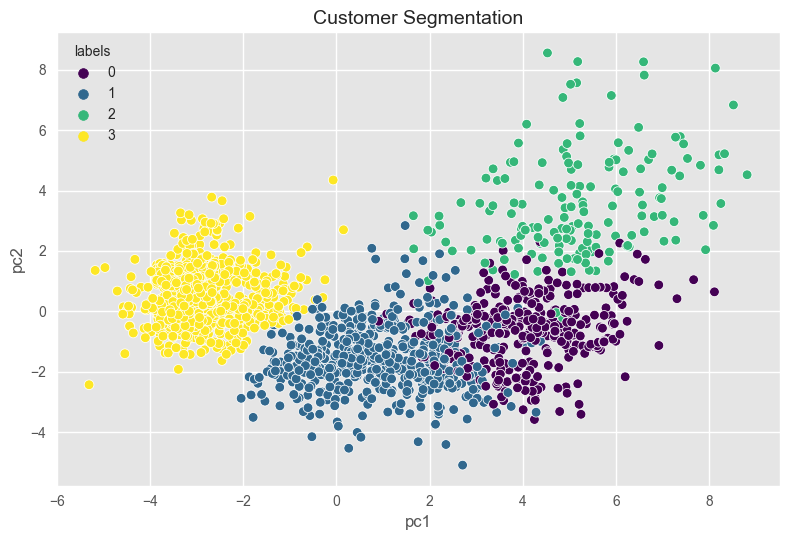

In [482]:
sns.scatterplot(data=pca_df,
                x='pc1',
                y='pc2',
                hue='labels',
                palette='viridis')
plt.title('Customer Segmentation', fontsize=14)
plt.tight_layout()
plt.show()